## Introduction

* Historical Growth in Exports: From 1950-51 to 2003-04, India's merchandise exports grew from USD 1.3 billion to USD 63.8 billion, with an annual growth rate of 7.6%.

* Post-Liberalization Progress: After economic reforms began in 1991, Indian exports grew faster than global demand, indicating improved competitiveness of Indian products.

* Trade Policy Changes Since 1991:

Simplified procedures.
Removal of quantitative restrictions.
Significant reductions in tariff rates.
Growth in Export of Services: The 1990s saw remarkable growth in the export of services such as IT and telecommunications, thanks to liberalization.

* Impact of Economic Reforms:

Introduced transparency, openness, and integration with global markets.
Focused on liberalization and globalization.

* Factors Influencing Trade Growth:

Dependent on global trade dynamics, especially with key trading partners.
Affected by international price changes and developments in competitor countries.
Influenced by exchange rate movements, especially between the Indian rupee and the US dollar.

## Objective

The main objective of this notebook is to examine the trends in India‟s exports and import in terms of value and to examine the structural changes in composition of India‟s exports amd import.

## Importing Packages and Collecting Data

In [146]:
'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

'''Import basic modules.'''
import pandas as pd
import numpy as np
from scipy import stats

'''Customize visualization
Seaborn and matplotlib visualization.'''
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns                   
sns.set_style("whitegrid") 

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [147]:
'''Read in export and import data from CSV file'''
df_export = pd.read_csv('/kaggle/input/india-trade-data/2010_2021_HS2_export.csv')
df_import = pd.read_csv('/kaggle/input/india-trade-data/2010_2021_HS2_import.csv')

In [149]:
print(df_export.shape)
print(df_import.shape)

(184755, 5)
(101051, 5)


In [150]:
'''Export and Import data at a glance.'''
bold('**Preview of Export Data:**')
display(df_export.sample(n=5))
bold('**Preview of Import Data:**')
display(df_import.sample(n=5))

**Preview of Export Data:**

,HSCode,Commodity,value,country,year
56740,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",7.64,SOUTH AFRICA,2013
146937,59,"IMPREGNATED, COATED, COVERED OR LAMINATED TEXT...",0.00,NAMIBIA,2019
148967,64,"FOOTWEAR, GAITERS AND THE LIKE; PARTS OF SUCH ...",20.57,RUSSIA,2019
171093,22,"BEVERAGES, SPIRITS AND VINEGAR.",1.20,BURKINA FASO,2021
65007,34,"SOAP, ORGANIC SURFACE-ACTIVE AGENTS, WASHING P...",NaN,GUADELOUPE,2014


**Preview of Import Data:**

,HSCode,Commodity,value,country,year
42042,47,PULP OF WOOD OR OF OTHER FIBROUS CELLULOSIC MA...,1.62,AUSTRIA,2015
13961,1,LIVE ANIMALS.,NaN,PHILIPPINES,2011
95434,19,"PREPARATIONS OF CEREALS, FLOUR, STARCH OR MILK...",0.00,HONG KONG,2021
9553,19,"PREPARATIONS OF CEREALS, FLOUR, STARCH OR MILK...",1.80,CHINA P RP,2011
39514,95,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...",NaN,SAUDI ARAB,2014


#### *In both the files we have 5 columns each are HSCode, Commodity, value, country, year.*

### <font color="blue" face="Constantia">What is an HS Code?</font>
HSCode:- HS stands for Harmonized System. It was developed by the WCO (World Customs Organization) as a multipurpose international product nomenclature that describes the type of good that is shipped.

### <font color="blue" face="Constantia">HS Code Structure</font>
The HS code can be described as follows:
* It is a six-digit identification code.
* It has 5000 commodity groups.
* Those groups have 99 chapters.
* Those chapters have 21 sections.
* It’s arranged in a legal and logical structure.
* Well-defined rules support it to realize uniform classification worldwide
* [HSCode List](http://www.cybex.in/HS-Codes/Default.aspx)

### <font color="blue" face="Constantia">What is Commodity?</font>
In economics, a commodity is defined as a tangible good that can be bought and sold or exchanged for products of similar value. Natural resources such as oil as well as basic foods like corn are two common types of commodities. Like other classes of assets such as stocks, commodities have value and can be traded on open markets. And like other assets, commodities can fluctuate in price according to supply and demand.

- **Value**: values for export and import of commodities in million US $.
- **Export**: Exports are the goods and services produced in one country and purchased by residents of another country.
- **Import**: Imports are foreign goods and services bought by residents of a country. Residents include citizens, businesses, and the government.
- **Country**: Country Imported From/ Exported To
- **Year**: Year in which comodities where Imported/Exported which is in between 2010 to 2018.

In [151]:
'''Variable Description'''
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    return summary

In [152]:
bold('**Variable Description of export dataset:**')
display(description(df_export))

bold('**Variable Description of import dataset:**')
display(description(df_import))

**Variable Description of export dataset:**

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,HSCode,int64,0,98,2,3,4
1,Commodity,object,0,98,MEAT AND EDIBLE MEAT OFFAL.,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...
2,value,float64,19258,12944,1.4,0.08,3.89
3,country,object,0,249,AFGHANISTAN,AFGHANISTAN,AFGHANISTAN
4,year,int64,0,12,2010,2010,2010


**Variable Description of import dataset:**

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,HSCode,int64,0,98,7,8,9
1,Commodity,object,0,98,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,"COFFEE, TEA, MATE AND SPICES."
2,value,float64,15745,11062,9.14,93.82,2.54
3,country,object,0,243,AFGHANISTAN,AFGHANISTAN,AFGHANISTAN
4,year,int64,0,12,2010,2010,2010


## Data preprocessing

In [153]:
"""Let's see if export and import data contain the zero and NAN values """
bold('**Export Data with zeros:**')
display(df_export[df_export.value == 0].head(3))
bold('**Import Data with zeros:**')
display(df_import[df_import.value == 0].head(3))
bold('**Export Data with NAN:**')
display(df_export.isnull().sum())
bold('**Import Data with NAN:**')
display(df_import.isnull().sum())

**Export Data with zeros:**

,HSCode,Commodity,value,country,year
14,16,"PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEAN...",0.0,AFGHANISTAN,2010
21,23,RESIDUES AND WASTE FROM THE FOOD INDUSTRIES; P...,0.0,AFGHANISTAN,2010
31,35,ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GL...,0.0,AFGHANISTAN,2010


**Import Data with zeros:**

,HSCode,Commodity,value,country,year
5,16,"PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEAN...",0.0,AFGHANISTAN,2010
6,18,COCOA AND COCOA PREPARATIONS.,0.0,AFGHANISTAN,2010
9,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",0.0,AFGHANISTAN,2010


**Export Data with NAN:**

HSCode           0
Commodity        0
value        19258
country          0
year             0
dtype: int64

**Import Data with NAN:**

HSCode           0
Commodity        0
value        15745
country          0
year             0
dtype: int64

In [154]:
df_import = df_import.dropna()
df_import['country'] = df_import['country'].replace({'U S A': 'USA'})
df_import['country'] = df_import['country'].replace({'SAUDI ARAB': 'SAUDI ARABIA'})
df_import['country'] = df_import['country'].replace({'U K': 'UK'})
df_import = df_import.reset_index(drop=True)

df_export = df_export.dropna()
df_export['country'] = df_export['country'].replace({'U S A': 'USA'})
df_export['country'] = df_export['country'].replace({'SAUDI ARAB': 'SAUDI ARABIA'})
df_export['country'] = df_export['country'].replace({'U K': 'UK'})
df_export = df_export.reset_index(drop=True)

## 1. Year Wise Analysis

In [155]:
'''Coverting dataset in year wise'''
exp_year = df_export.groupby('year').agg({'value': 'sum'})
exp_year = exp_year.rename(columns={'value': 'Export'})
imp_year = df_import.groupby('year').agg({'value': 'sum'})
imp_year = imp_year.rename(columns={'value': 'Import'})

'''Calculating the growth of export and import'''
exp_year['Growth Rate(E)'] = exp_year.pct_change()
imp_year['Growth Rate(I)'] = imp_year.pct_change()

'''Calculating trade deficit'''
total_year = pd.concat([exp_year, imp_year], axis = 1)
total_year['Trade Deficit'] = exp_year.Export - imp_year.Import

bold('**Export/Import and Trade Balance of India**')
display(total_year)
bold('**Descriptive statistics**')
display(total_year.describe())

**Export/Import and Trade Balance of India**

,Export,Growth Rate(E),Import,Growth Rate(I),Trade Deficit
year,,,,,
2010,249801.18,NaN,369762.25,NaN,-119961.07
2011,305948.28,0.224767,489311.81,0.323315,-183363.53
2012,300384.32,-0.018186,490730.07,0.002898,-190345.75
2013,314388.61,0.046621,450192.99,-0.082606,-135804.38
2014,310321.02,-0.012938,448026.63,-0.004812,-137705.61
2015,262274.30,-0.154829,381000.97,-0.149602,-118726.67
2016,275835.27,0.051705,384350.29,0.008791,-108515.02
2017,303507.85,0.100323,465574.02,0.211327,-162066.17
2018,330058.64,0.087480,514071.33,0.104167,-184012.69


**Descriptive statistics**

,Export,Growth Rate(E),Import,Growth Rate(I),Trade Deficit
count,12.000000,11.000000,12.000000,11.000000,12.000000
mean,306636.203333,0.059246,456266.375000,0.065641,-149630.171667
std,43052.939353,0.162889,69331.700692,0.219915,33102.919639
min,249801.180000,-0.154829,369762.250000,-0.169101,-191061.040000
25%,287800.912500,-0.034418,391909.307500,-0.079595,-183525.820000
50%,304728.065000,0.046621,457883.505000,0.002898,-149533.110000
75%,313603.007500,0.093901,489666.375000,0.157747,-119652.470000
max,421984.370000,0.446195,613045.410000,0.554261,-102639.520000


### <font color="blue" face="Constantia">Growth Rate:</font>
Growth rates refer to the percentage change of a specific variable from its previous value. we calucate the annual growth rate.
### <font color="blue" face="Constantia">Trade Deficit:</font>
A trade deficit is an amount by which the cost of a country's imports exceeds the cost of its exports. It's one way of measuring international trade, and it's also called a negative balance of trade. You can calculate a trade deficit by subtracting the total value of a country's exports from the total value of its imports.


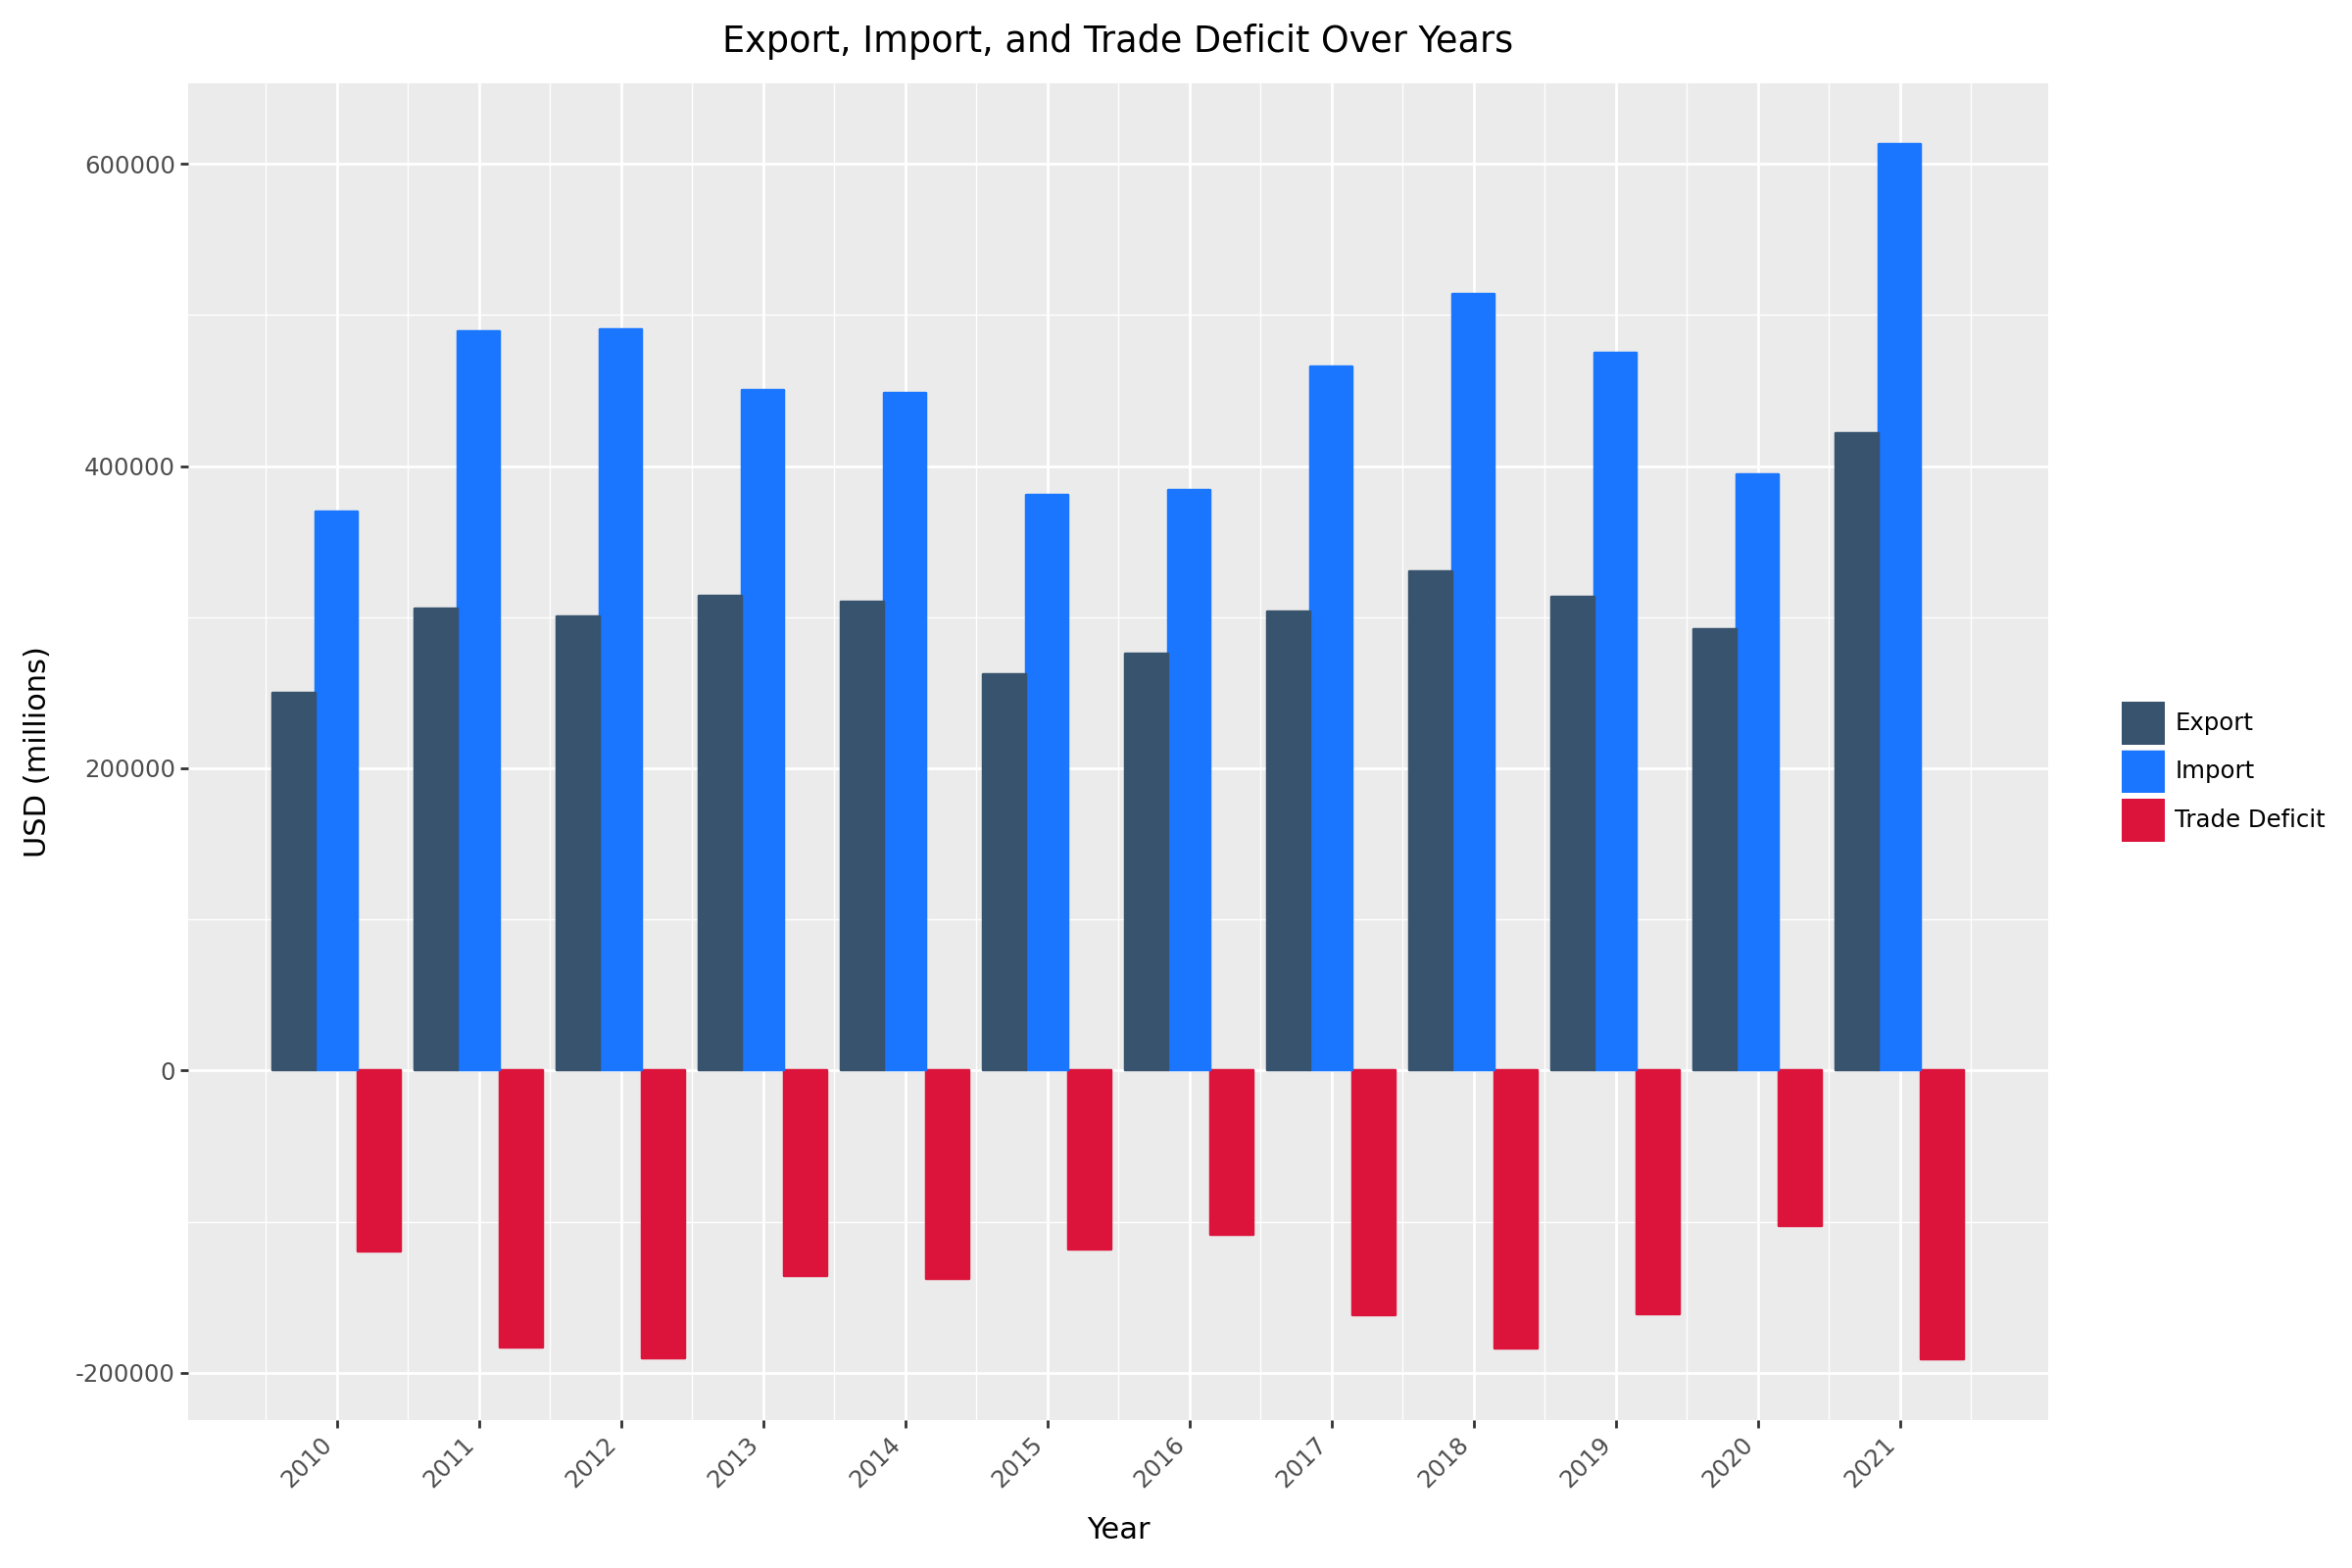

In [156]:
total_year_filtered = total_year[['Export', 'Import', 'Trade Deficit']]

# Reshape the DataFrame for plotting
total_year_melted = total_year_filtered.reset_index().melt(id_vars=['year'], var_name='Variable', value_name='Value')

custom_colors = {'Export': '#37536d', 'Import': '#1a76ff', 'Trade Deficit': 'crimson'}
# Create the bar plot
plot = (
    ggplot(total_year_melted, aes(x='year', y='Value', fill='Variable', color='Variable')) +
    geom_bar(stat='identity', position='dodge') +
    ggtitle("Export, Import, and Trade Deficit Over Years") +
    xlab("Year") +
    ylab("USD (millions)") +
    scale_x_continuous(breaks=total_year.index.tolist()) +
    scale_color_manual(values=custom_colors) +
    scale_fill_manual(values=custom_colors) +
    theme(axis_text_x = element_text(angle=45, hjust=1),figure_size=(12, 8),legend_title=element_text(text=''))
)

# Print the plot
print(plot)
ggsave(plot, "plot1.png")


* Exports and Imports have seen a major bump in year 2021.
* The country has been experiencing trade deficits consistently for a decade indicating that the country's domestic demand for goods and services exceeds its domestic production.
* This might be due to several reasons such as domestic industries being less competitive, lack of natural resources, or consumer preference for foreign goods.

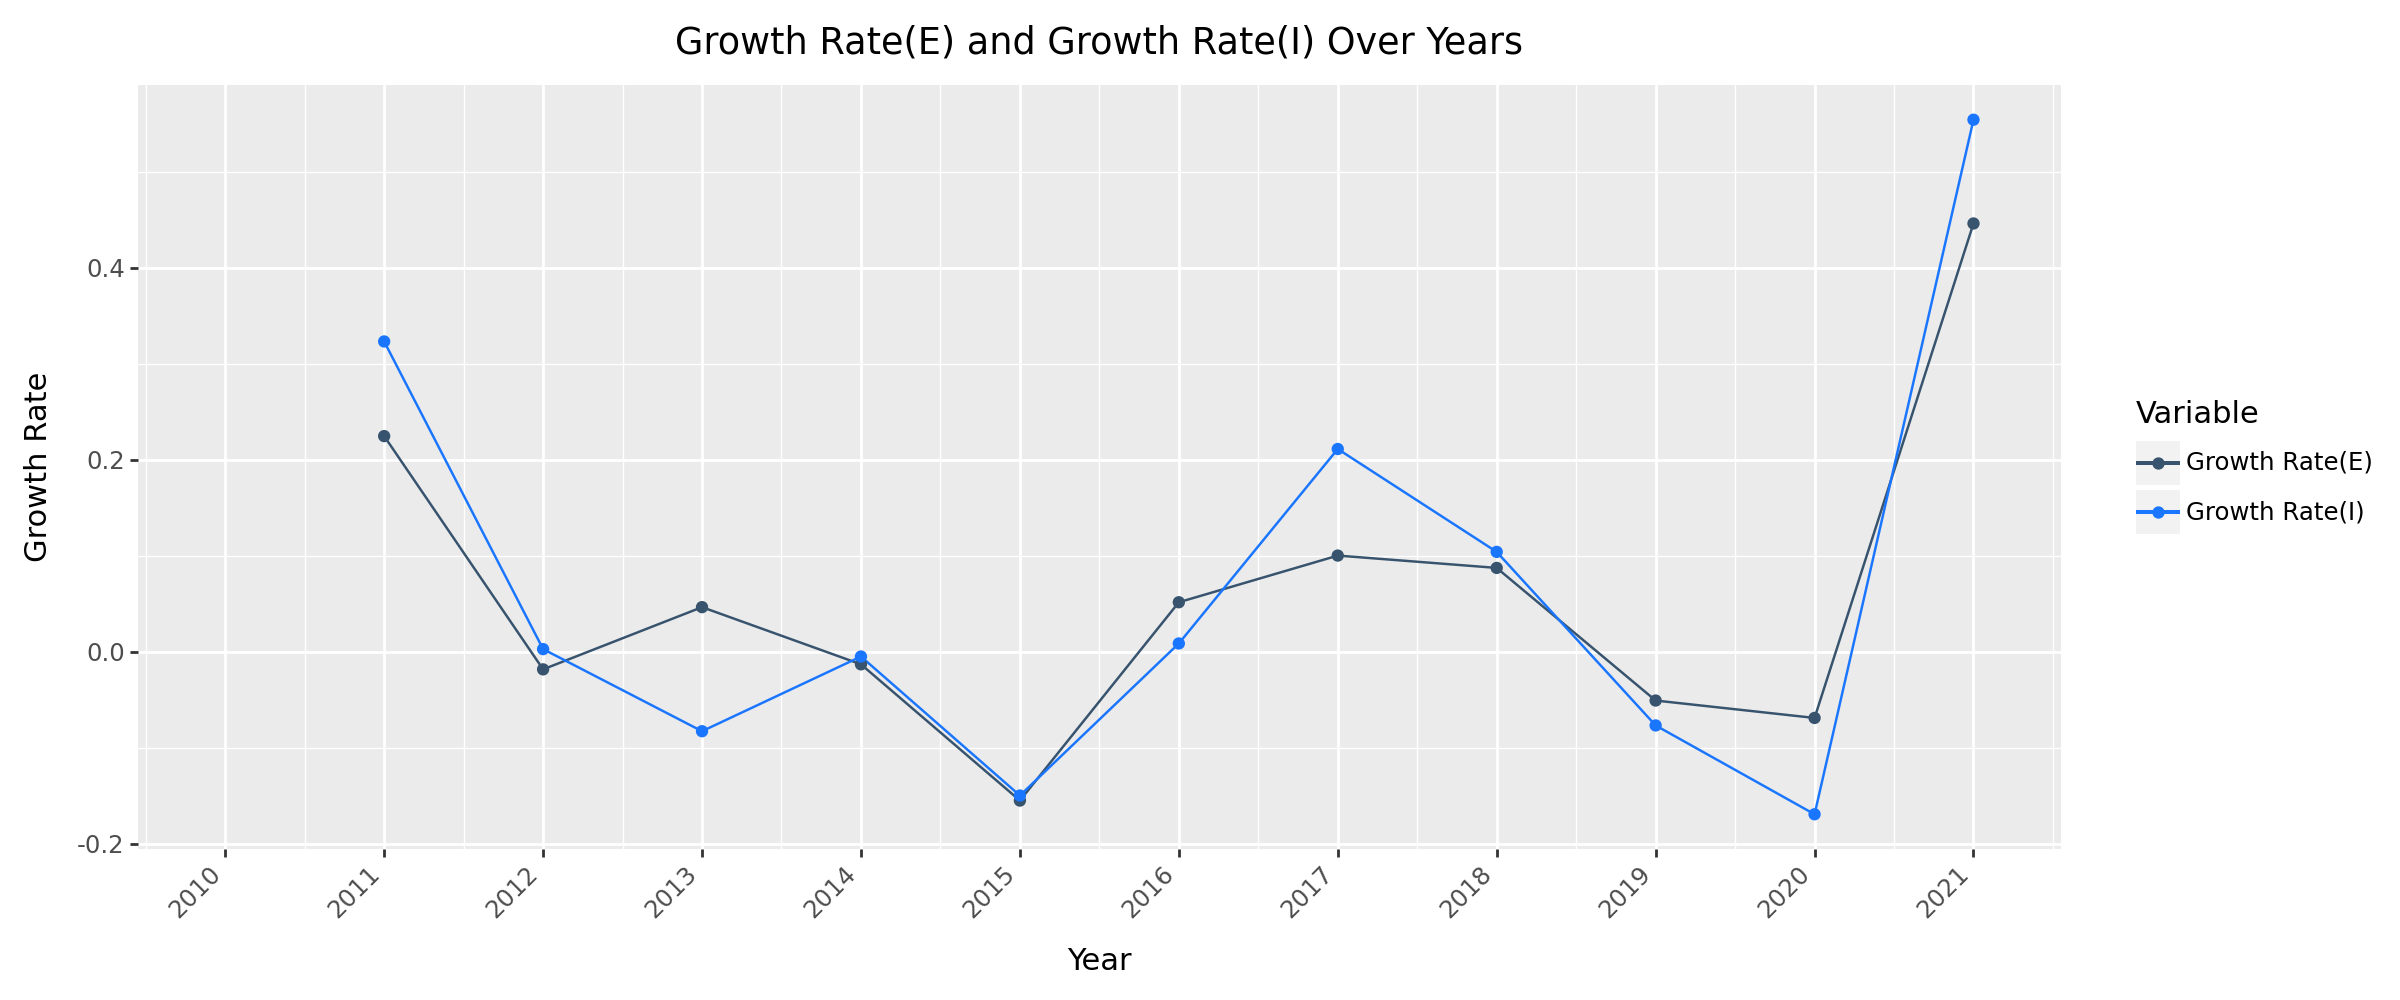

In [157]:
growth_rates = total_year[['Growth Rate(E)', 'Growth Rate(I)']]

# Reshape the DataFrame for plotting
growth_rates_melted = growth_rates.reset_index().melt(id_vars=['year'], var_name='Variable', value_name='Value')

custom_colors = {'Growth Rate(E)': '#37536d', 'Growth Rate(I)': '#1a76ff'}
# Create the scatter plot
plot = (
    ggplot(growth_rates_melted, aes(x='year', y='Value', color='Variable')) +
    geom_line() +
    geom_point() +
    ggtitle("Growth Rate(E) and Growth Rate(I) Over Years") +
    xlab("Year") +
    ylab("Growth Rate") +
    scale_x_continuous(breaks=total_year.index.tolist()) +
    scale_color_manual(values=custom_colors) +
    theme(axis_text_x=element_text(angle=45, hjust=1),figure_size=(12, 5))
)

# Print the scatter plot
print(plot)
ggsave(plot, "plot2.png")

* Growth rates of both imports and exports have increased for the year 2021 which were consisirently decreasing from year 2017 till 2020
* This increased export growth indicates that domestic goods and services are getting competitive on the international market.
* An increase in import growth generally indicates rising domestic demand and consumer confidence.

## Commodity Wise Analysis

In [158]:
'''Commodity export/Import count'''
print('Total number of Export commodity:', df_export['Commodity'].nunique())
print('Total number of Import commodity:', df_import['Commodity'].nunique())

Total number of Export commodity: 98
Total number of Import commodity: 98


In [159]:
"""Let's count the most importing and exporting commodities"""
bold('**Most Exporting Commodities(In Numbers) from 2010 to 2021**')
display(pd.DataFrame(df_export['Commodity'].value_counts().head(20)))
bold('**Most Importing Commodities(In Numbers) from 2010 to 2021**')
display(pd.DataFrame(df_import['Commodity'].value_counts().head(20)))

**Most Exporting Commodities(In Numbers) from 2010 to 2021**

,count
Commodity,
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",2537
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",2514
PHARMACEUTICAL PRODUCTS,2513
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",2488
PLASTIC AND ARTICLES THEREOF.,2435
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.",2421
ARTICLES OF IRON OR STEEL,2401
"VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF.",2400
OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLOTHING AND WORN TEXTILE ARTICLES; RAGS,2395


**Most Importing Commodities(In Numbers) from 2010 to 2021**

,count
Commodity,
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",2081
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",1970
IRON AND STEEL,1828
ALUMINIUM AND ARTICLES THEREOF.,1716
PLASTIC AND ARTICLES THEREOF.,1712
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",1626
COPPER AND ARTICLES THEREOF.,1498
ARTICLES OF IRON OR STEEL,1460
WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,1396


In [160]:
'''Coverting dataset in commodity wise'''
exp_comm = df_export.groupby('Commodity').agg({'value':'sum'})
exp_comm = exp_comm.sort_values(by = 'value', ascending = False)
exp_comm = exp_comm[:20]

imp_comm = df_import.groupby('Commodity').agg({'value':'sum'})
imp_comm = imp_comm.sort_values(by = 'value', ascending = False)
imp_comm = imp_comm[:20]

In [161]:
print(exp_comm)
print(imp_comm)

                                                        value
Commodity                                                    
MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THE...  573781.24
NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPREC...  484859.90
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...  189003.07
VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING ...  174616.34
ORGANIC CHEMICALS                                   170491.42
PHARMACEUTICAL PRODUCTS                             156859.86
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS TH...  139396.39
IRON AND STEEL                                      120904.29
CEREALS.                                             97642.07
ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, N...   96902.61
COTTON.                                              94126.62
ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, K...   84336.04
ARTICLES OF IRON OR STEEL                            84097.54
PLASTIC AND ARTICLES THEREOF.                        72896.40
FISH AND

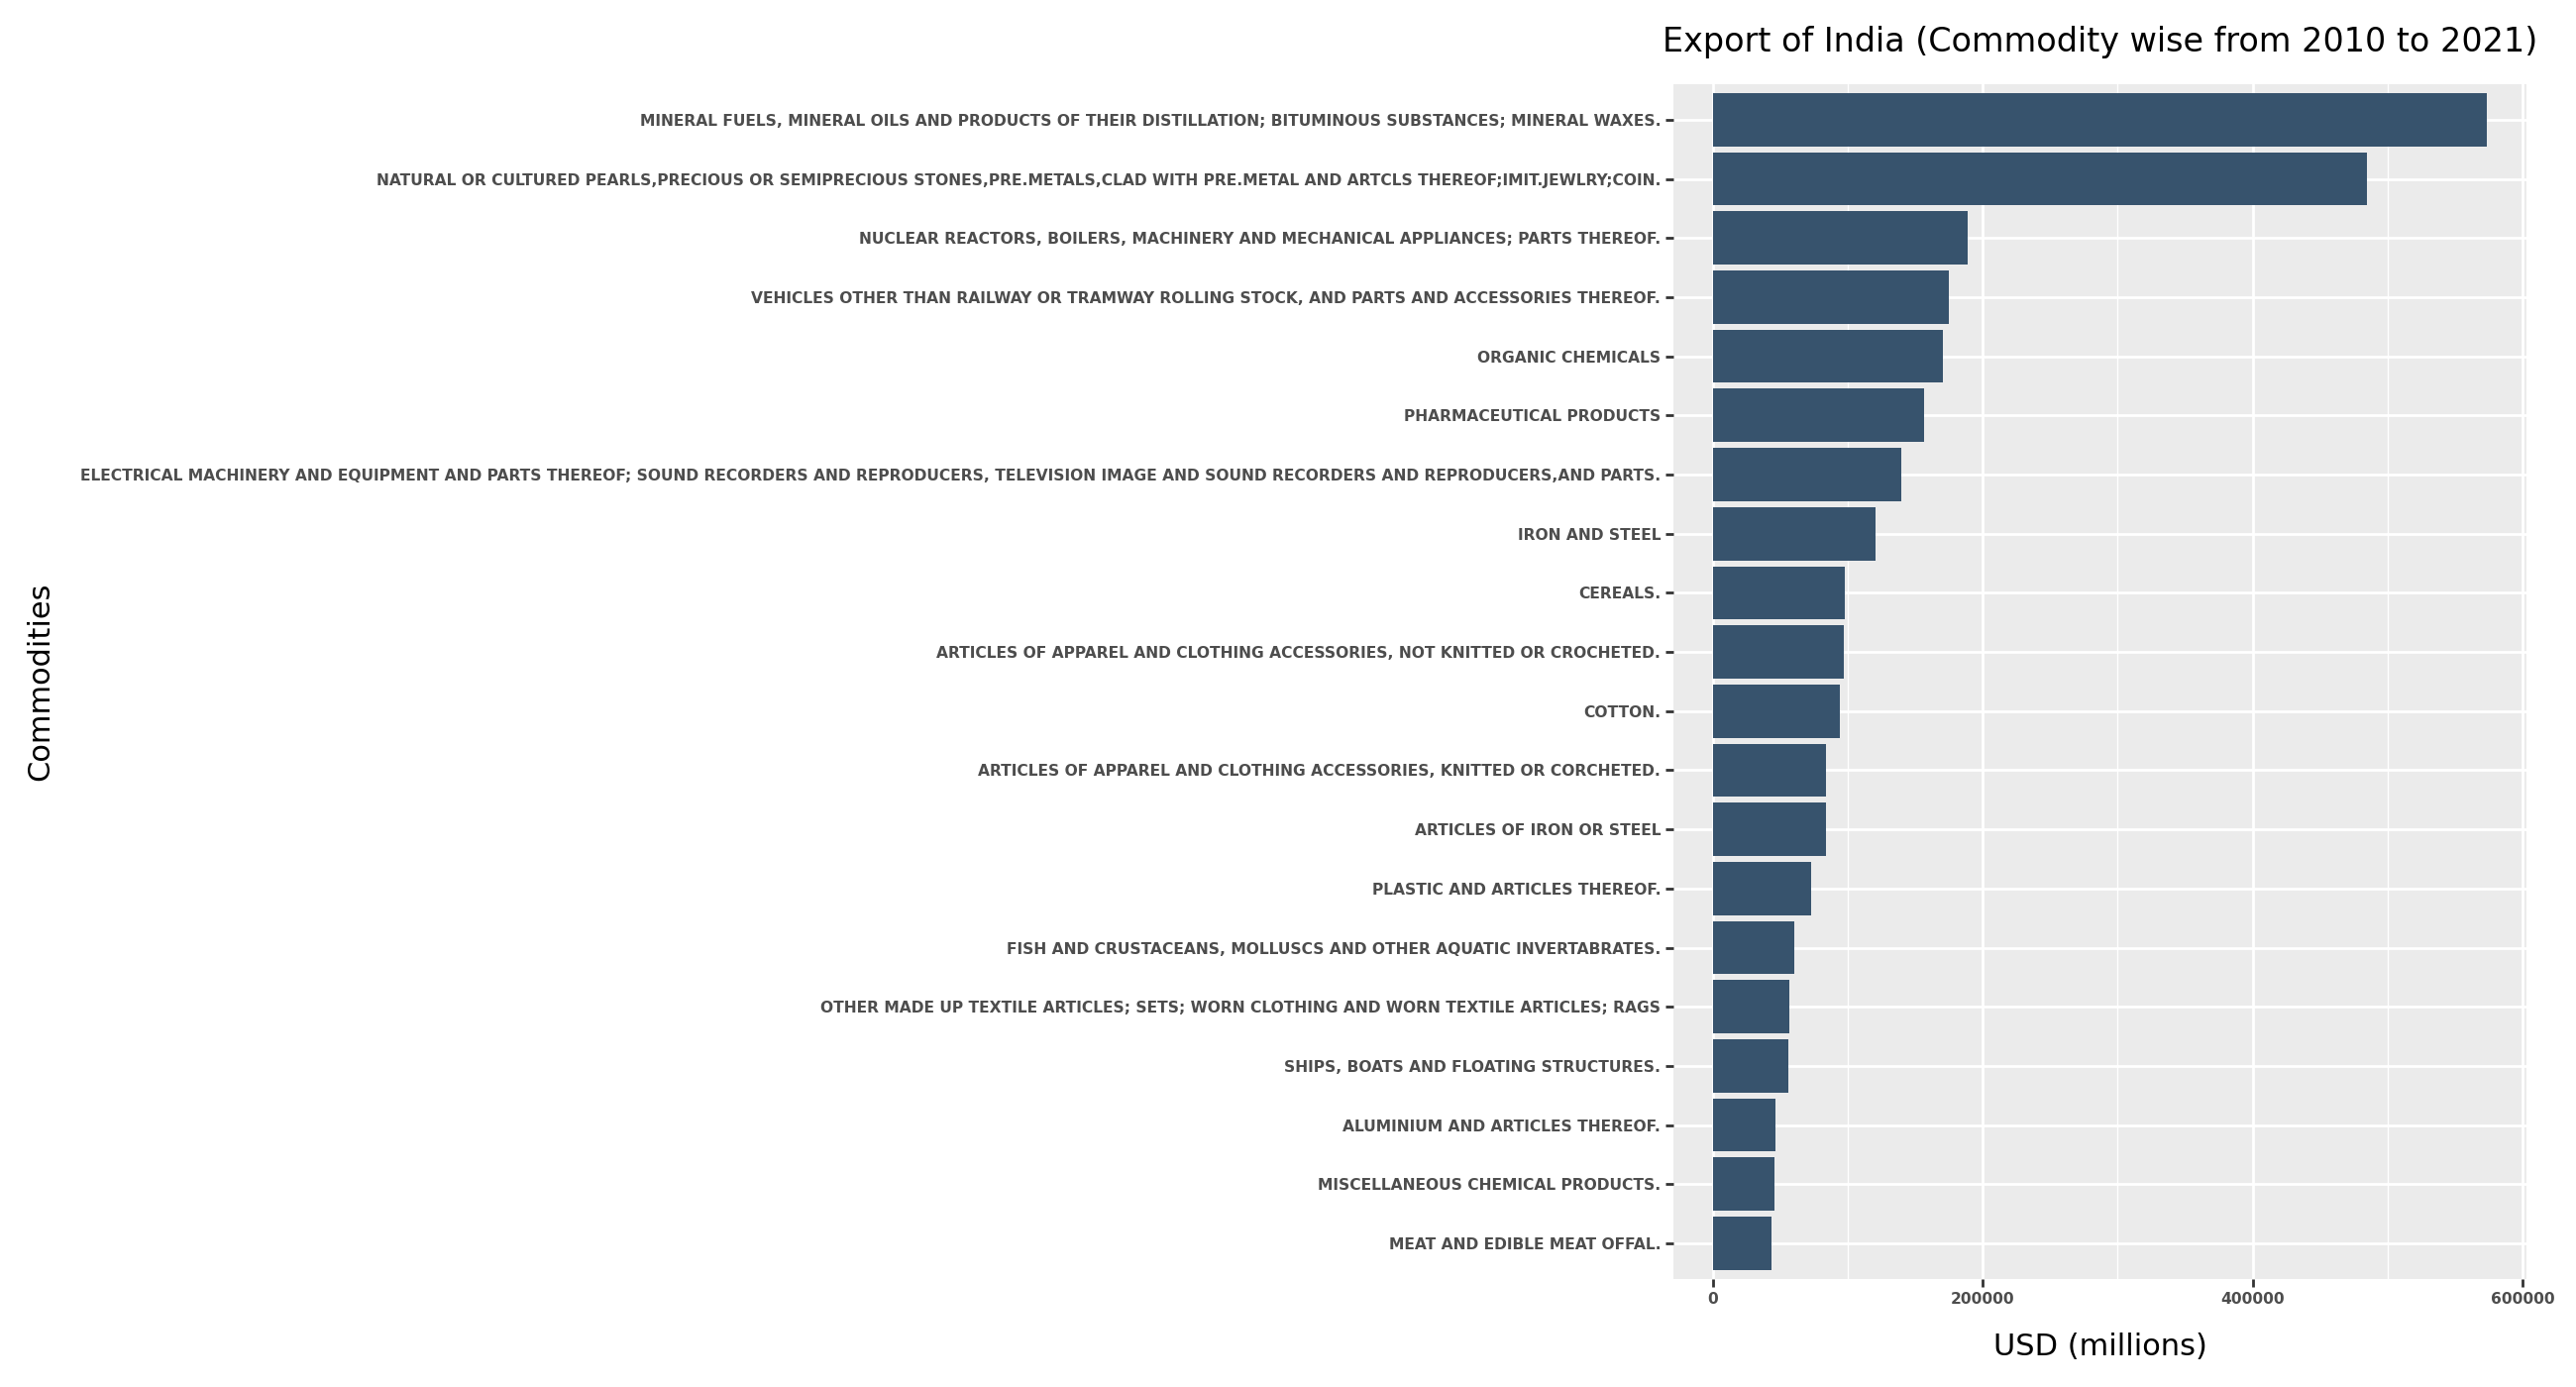

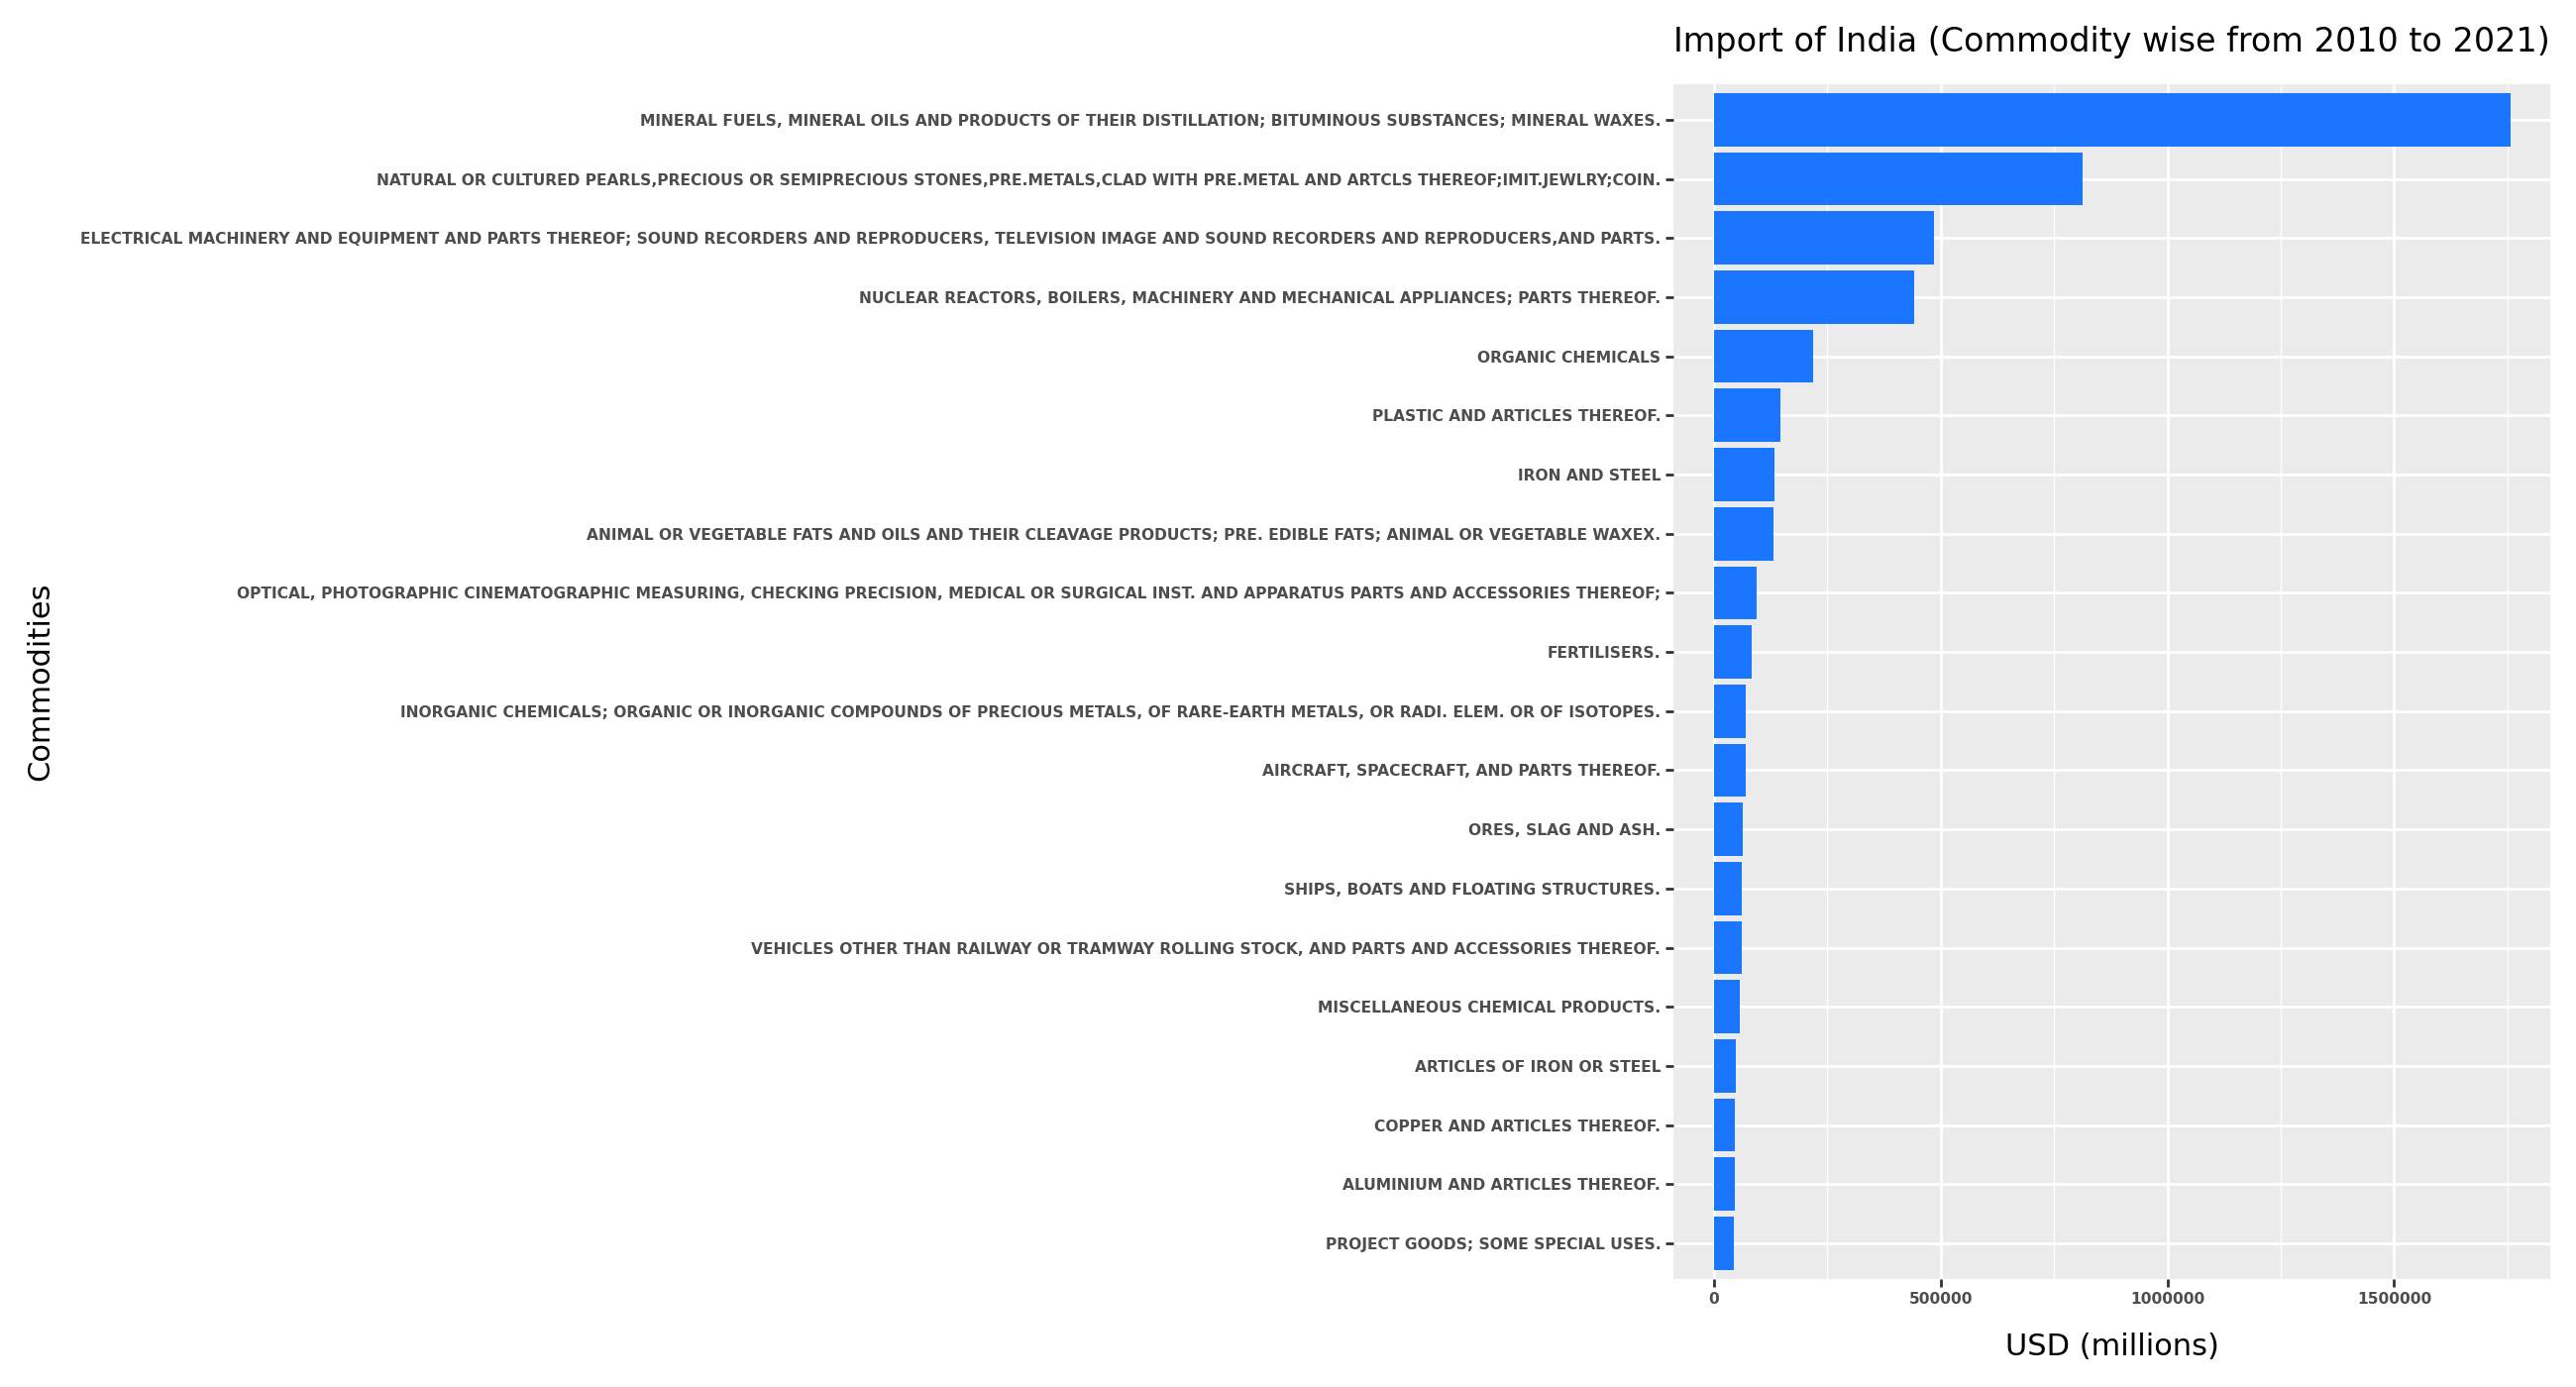

In [162]:
plot = (ggplot(exp_comm, aes(x='reorder(exp_comm.index, +value)', y='value')) +
        geom_bar(stat='identity', fill='#37536d') + 
        theme(axis_text_x=element_text(size=5.6, weight='bold'),  
              axis_text_y=element_text(size=5.6, weight='bold'),  
              plot_title=element_text(size=12),
             figure_size=(13,7)) +
        labs(x='Commodities', y='USD (millions)', title='Export of India (Commodity wise from 2010 to 2021)') +
        coord_flip())

print(plot)
ggsave(plot, "plot3.png")

plot = (ggplot(imp_comm, aes(x='reorder(imp_comm.index, +value)', y='value')) +
        geom_bar(stat='identity', fill='#1a76ff') + 
        scale_fill_brewer(type='qual', palette='Set1') +
        theme(axis_text_x=element_text(size=5.6, weight='bold'),  
              axis_text_y=element_text(size=5.6, weight='bold'),  
              plot_title=element_text(size=12),
             figure_size=(13,7)) +
        labs(x='Commodities', y='USD (millions)', title='Import of India (Commodity wise from 2010 to 2021)') +
        coord_flip())

print(plot)
ggsave(plot, "plot4.png")

In [163]:
'''Create pivot table of export/import (commodity wise)'''
exp_comm_table = pd.pivot_table(df_export, values = 'value', index = 'Commodity', columns = 'year')
imp_comm_table = pd.pivot_table(df_import, values = 'value', index = 'Commodity', columns = 'year')
bold('**Commodity Composition of Exports**')
display(exp_comm_table.sample(n=5))
bold('**Commodity Composition of Imports**')
display(imp_comm_table.sample(n=5))

**Commodity Composition of Exports**

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Commodity,,,,,,,,,,,,
"FURSKINS AND ARTIFICIAL FUR, MANUFACTURES THEREOF.",0.009412,0.029636,0.007059,0.025143,0.066286,0.103750,0.168143,0.150759,0.172400,0.188806,0.252321,0.398333
RUBBER AND ARTICLES THEREOF.,10.378407,13.987725,15.072609,13.597716,14.655269,12.468579,12.916218,14.956616,16.358571,15.884824,16.349397,23.061741
MISCELLANEOUS MANUFACTURED ARTICLES.,1.880734,2.223427,2.537514,2.688444,2.894645,2.937647,2.997676,2.954973,3.322634,3.294815,2.768836,3.467157
EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR MELONS.,8.957087,11.938110,9.739862,11.431056,11.185000,10.634765,11.775986,12.379667,11.001905,9.742876,9.202245,10.597172
"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.",237.417880,261.203094,244.515587,229.077473,224.592378,214.966413,239.686978,223.226364,214.016138,198.273791,151.235549,224.391200


**Commodity Composition of Imports**

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Commodity,,,,,,,,,,,,
OTHER BASE METALS; CERMETS; ARTICLES THEREOF.,3.580508,4.757049,5.224902,5.252037,5.488947,4.77537,5.181296,6.742881,7.659844,6.797619,5.543279,10.210000
PHOTOGRAPHIC OR CINEMATOGRAPHIC GOODS.,5.487959,6.111042,7.277442,6.380513,6.561081,5.88050,5.827879,5.692703,5.969143,5.880588,5.613600,6.564194
EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,25.159091,30.778125,44.757818,35.693000,51.534545,67.03850,61.248143,44.310448,16.067973,21.591918,25.511667,35.151818
SUGARS AND SUGAR CONFECTIONERY.,11.985357,2.600893,11.078103,10.099149,14.605532,13.85160,20.822075,16.939677,10.459231,7.444590,15.322653,5.568889
CERAMIC PRODUCTS.,7.717867,9.530814,9.685890,9.081324,11.735077,9.49680,6.299459,8.586571,8.788235,7.982895,7.715714,10.228235


**Trend of the Most Exporting Goods(In Values) From 2010 to 2021**

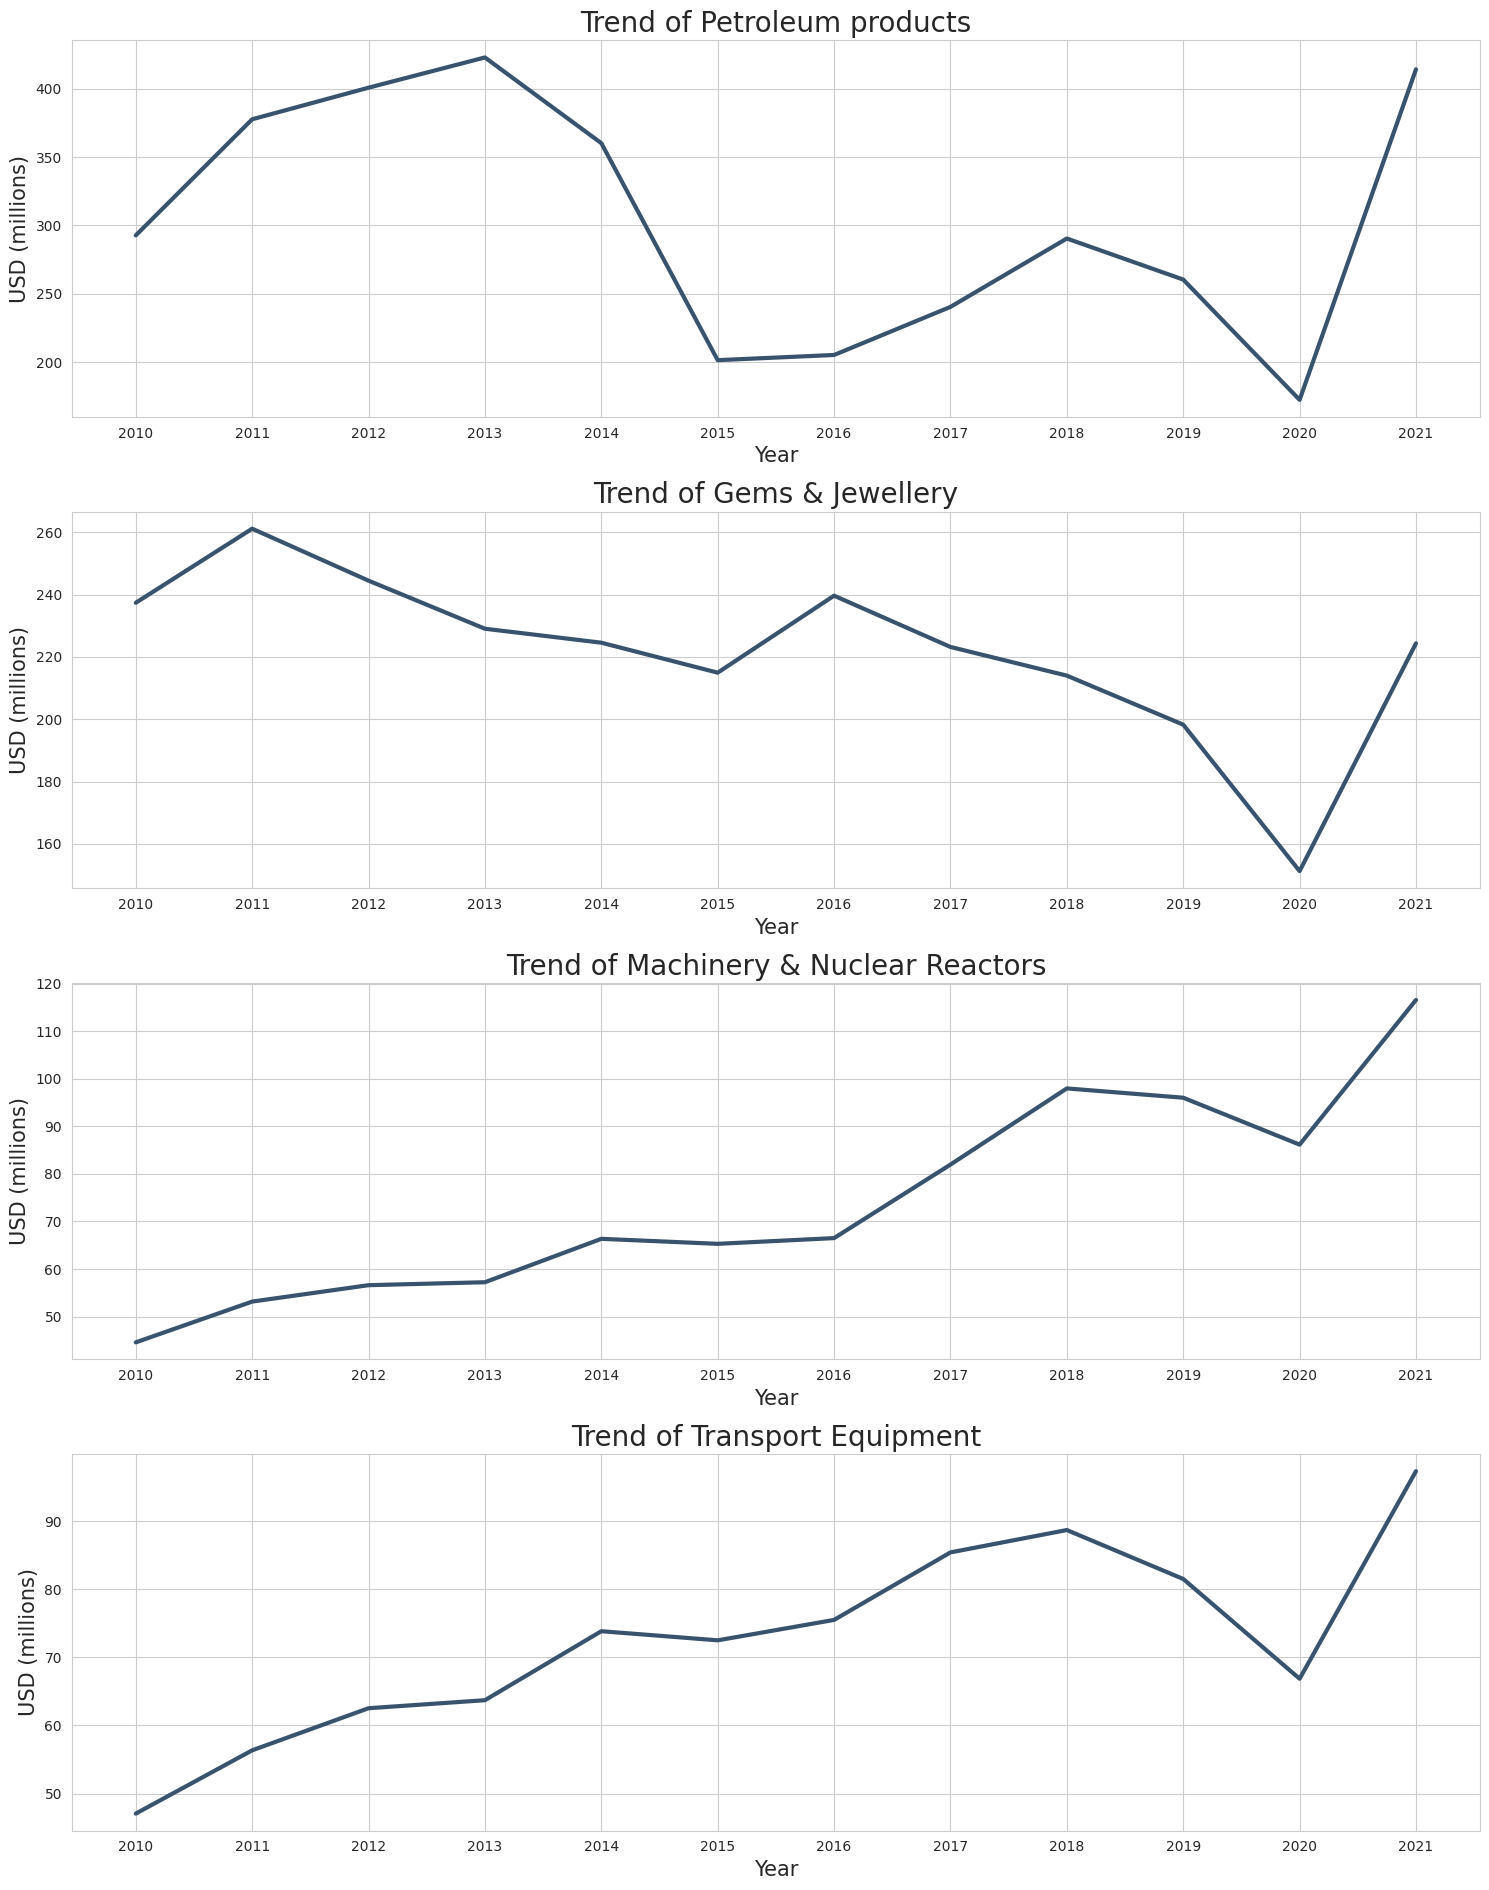

In [164]:
bold('**Trend of the Most Exporting Goods(In Values) From 2010 to 2021**')
plt.figure(figsize=(15,19))
categorical_years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

plt.subplot(411)
g = exp_comm_table.loc["MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES."].plot(color='#37536d', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_xticks(categorical_years)
g.set_title('Trend of Petroleum products', size = 20)

plt.subplot(412)
g1 = exp_comm_table.loc["NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN."].plot(color='#37536d', linewidth=3)
g1.set_ylabel('USD (millions)', fontsize = 15)
g1.set_xlabel('Year', fontsize = 15)
g1.set_xticks(categorical_years)
g1.set_title('Trend of Gems & Jewellery', size = 20)

plt.subplot(414)
g2 = exp_comm_table.loc["VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF."].plot(color='#37536d', linewidth=3)
g2.set_ylabel('USD (millions)', fontsize = 15)
g2.set_xlabel('Year', fontsize = 15)
g2.set_xticks(categorical_years)
g2.set_title('Trend of Transport Equipment', size = 20)


plt.subplot(413)
g3 = exp_comm_table.loc["NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF."].plot(color='#37536d', linewidth=3)
g3.set_ylabel('USD (millions)', fontsize = 15)
g3.set_xlabel('Year', fontsize = 15)
g3.set_xticks(categorical_years)
g3.set_title('Trend of Machinery & Nuclear Reactors', size = 20)

plt.subplots_adjust(hspace = 0.4)
plt.tight_layout()
plt.savefig('plot5.png')
plt.show()


* The Petroleum products have shown a dip from 2013 till 2015 then an increase till 2018 before dipping again till 2020 and then followed by a sharp rise in the year 2021.
* The exports of  Gems & Jewellery have shown a consistent major decline till 2020 before increasing in 2021.
* The exports of Transport Equipment and Machinery & Nuclear Reactors tend to show increase in trade.
* All of the four major export commodities have seen a major increase in the year 2021 as compared to the time before it.

**Trend of the Most Importing Goods(In Values) From 2010 to 2021**

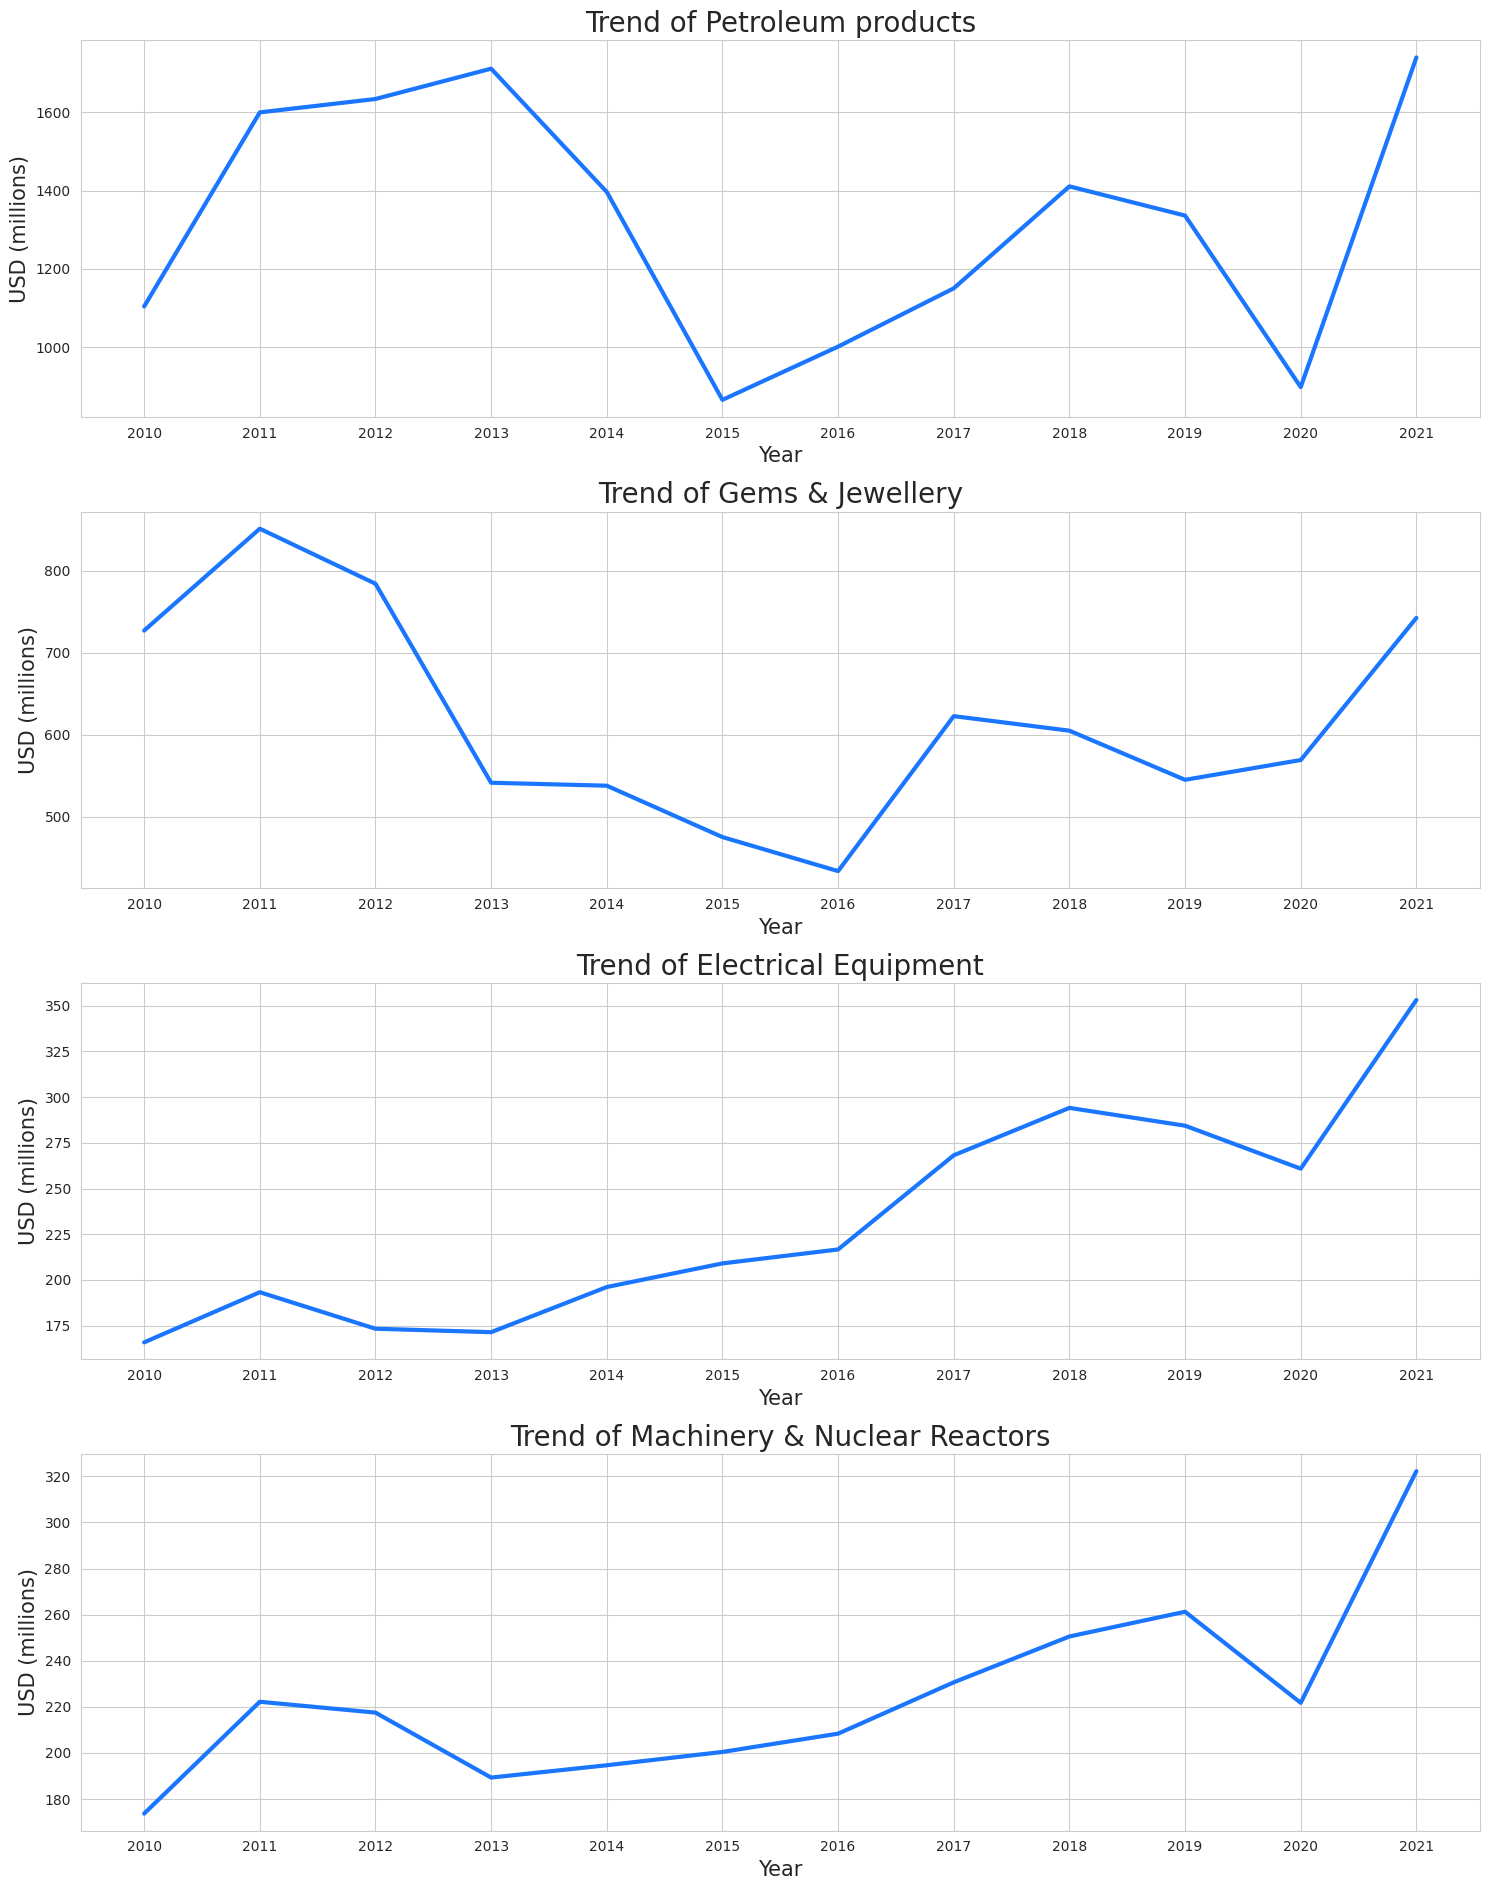

In [165]:
bold('**Trend of the Most Importing Goods(In Values) From 2010 to 2021**')
plt.figure(figsize=(15,19))
 
plt.subplot(411)
g = imp_comm_table.loc["MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES."].plot(color='#1a76ff', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_xticks(categorical_years)
g.set_title('Trend of Petroleum products', size = 20)

plt.subplot(412)
g1 = imp_comm_table.loc["NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN."].plot(color='#1a76ff', linewidth=3)
g1.set_ylabel('USD (millions)', fontsize = 15)
g1.set_xlabel('Year', fontsize = 15)
g1.set_xticks(categorical_years)
g1.set_title('Trend of Gems & Jewellery', size = 20)

plt.subplot(413)
g2 = imp_comm_table.loc["ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS."].plot(color='#1a76ff', linewidth=3)
g2.set_ylabel('USD (millions)', fontsize = 15)
g2.set_xlabel('Year', fontsize = 15)
g2.set_xticks(categorical_years)
g2.set_title('Trend of Electrical Equipment', size = 20)


plt.subplot(414)
g3 = imp_comm_table.loc["NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF."].plot(color='#1a76ff', linewidth=3)
g3.set_ylabel('USD (millions)', fontsize = 15)
g3.set_xlabel('Year', fontsize = 15)
g3.set_xticks(categorical_years)
g3.set_title('Trend of Machinery & Nuclear Reactors', size = 20)

plt.subplots_adjust(hspace = 0.4)
plt.tight_layout()
plt.savefig('plot6.png')
plt.show()


* The imports of  petroleums products have shown significant decline from 2013 to 2015 just like the exports indicating volatality of oil prices during that period.
* The imports of Gems and Jewellaries have shown a decreasing trend till 2020.
* From 2010 to 2015, imports of  Electrical Equipment and Machinery & Nuclear Reactors were low but after 2015 it started to increase.
* All four commodities have shown sharp increase of imports in 2021.

* Petroleum products, Gewelry, Machinery, Electrical Equipments have shown higher exports and imports indicating that they might be relying on complex global supply chains. Different components or stages of production may occur in different countries, leading to both imports and exports of the final product or its components.
* It might also be the case that the competitiveness of those products is very high.
* Both the insights highlights the interdependence of economies in the globalized world.

## Country Wise Analysis

In [168]:
'''Country export/Import count'''
print('Total number of country Export to:', df_export['country'].nunique())
print('Total number of country Import from:', df_import['country'].nunique())

Total number of country Export to: 249
Total number of country Import from: 242


In [169]:
'''Coverting dataset in Country wise'''
exp_country = df_export.groupby('country').agg({'value':'sum'})
exp_country = exp_country.rename(columns={'value': 'Export'})
exp_country = exp_country.sort_values(by = 'Export', ascending = False)
exp_country = exp_country[:20]

imp_country = df_import.groupby('country').agg({'value':'sum'})
imp_country = imp_country.rename(columns={'value': 'Import'})
imp_country = imp_country.sort_values(by = 'Import', ascending = False)
imp_country = imp_country[:20]

In [170]:
print(exp_country)

                    Export
country                   
USA              541487.45
U ARAB EMTS      362951.83
CHINA P RP       180865.06
HONG KONG        147807.24
SINGAPORE        130427.76
UK               107298.44
GERMANY           95153.81
NETHERLAND        93963.12
BANGLADESH PR     89520.36
SAUDI ARABIA      86847.66
BELGIUM           75098.44
UNSPECIFIED       66839.80
VIETNAM SOC REP   65171.06
NEPAL             63505.18
JAPAN             62953.11
MALAYSIA          62794.30
ITALY             62480.10
FRANCE            61353.39
INDONESIA         59775.33
TURKEY            56998.92


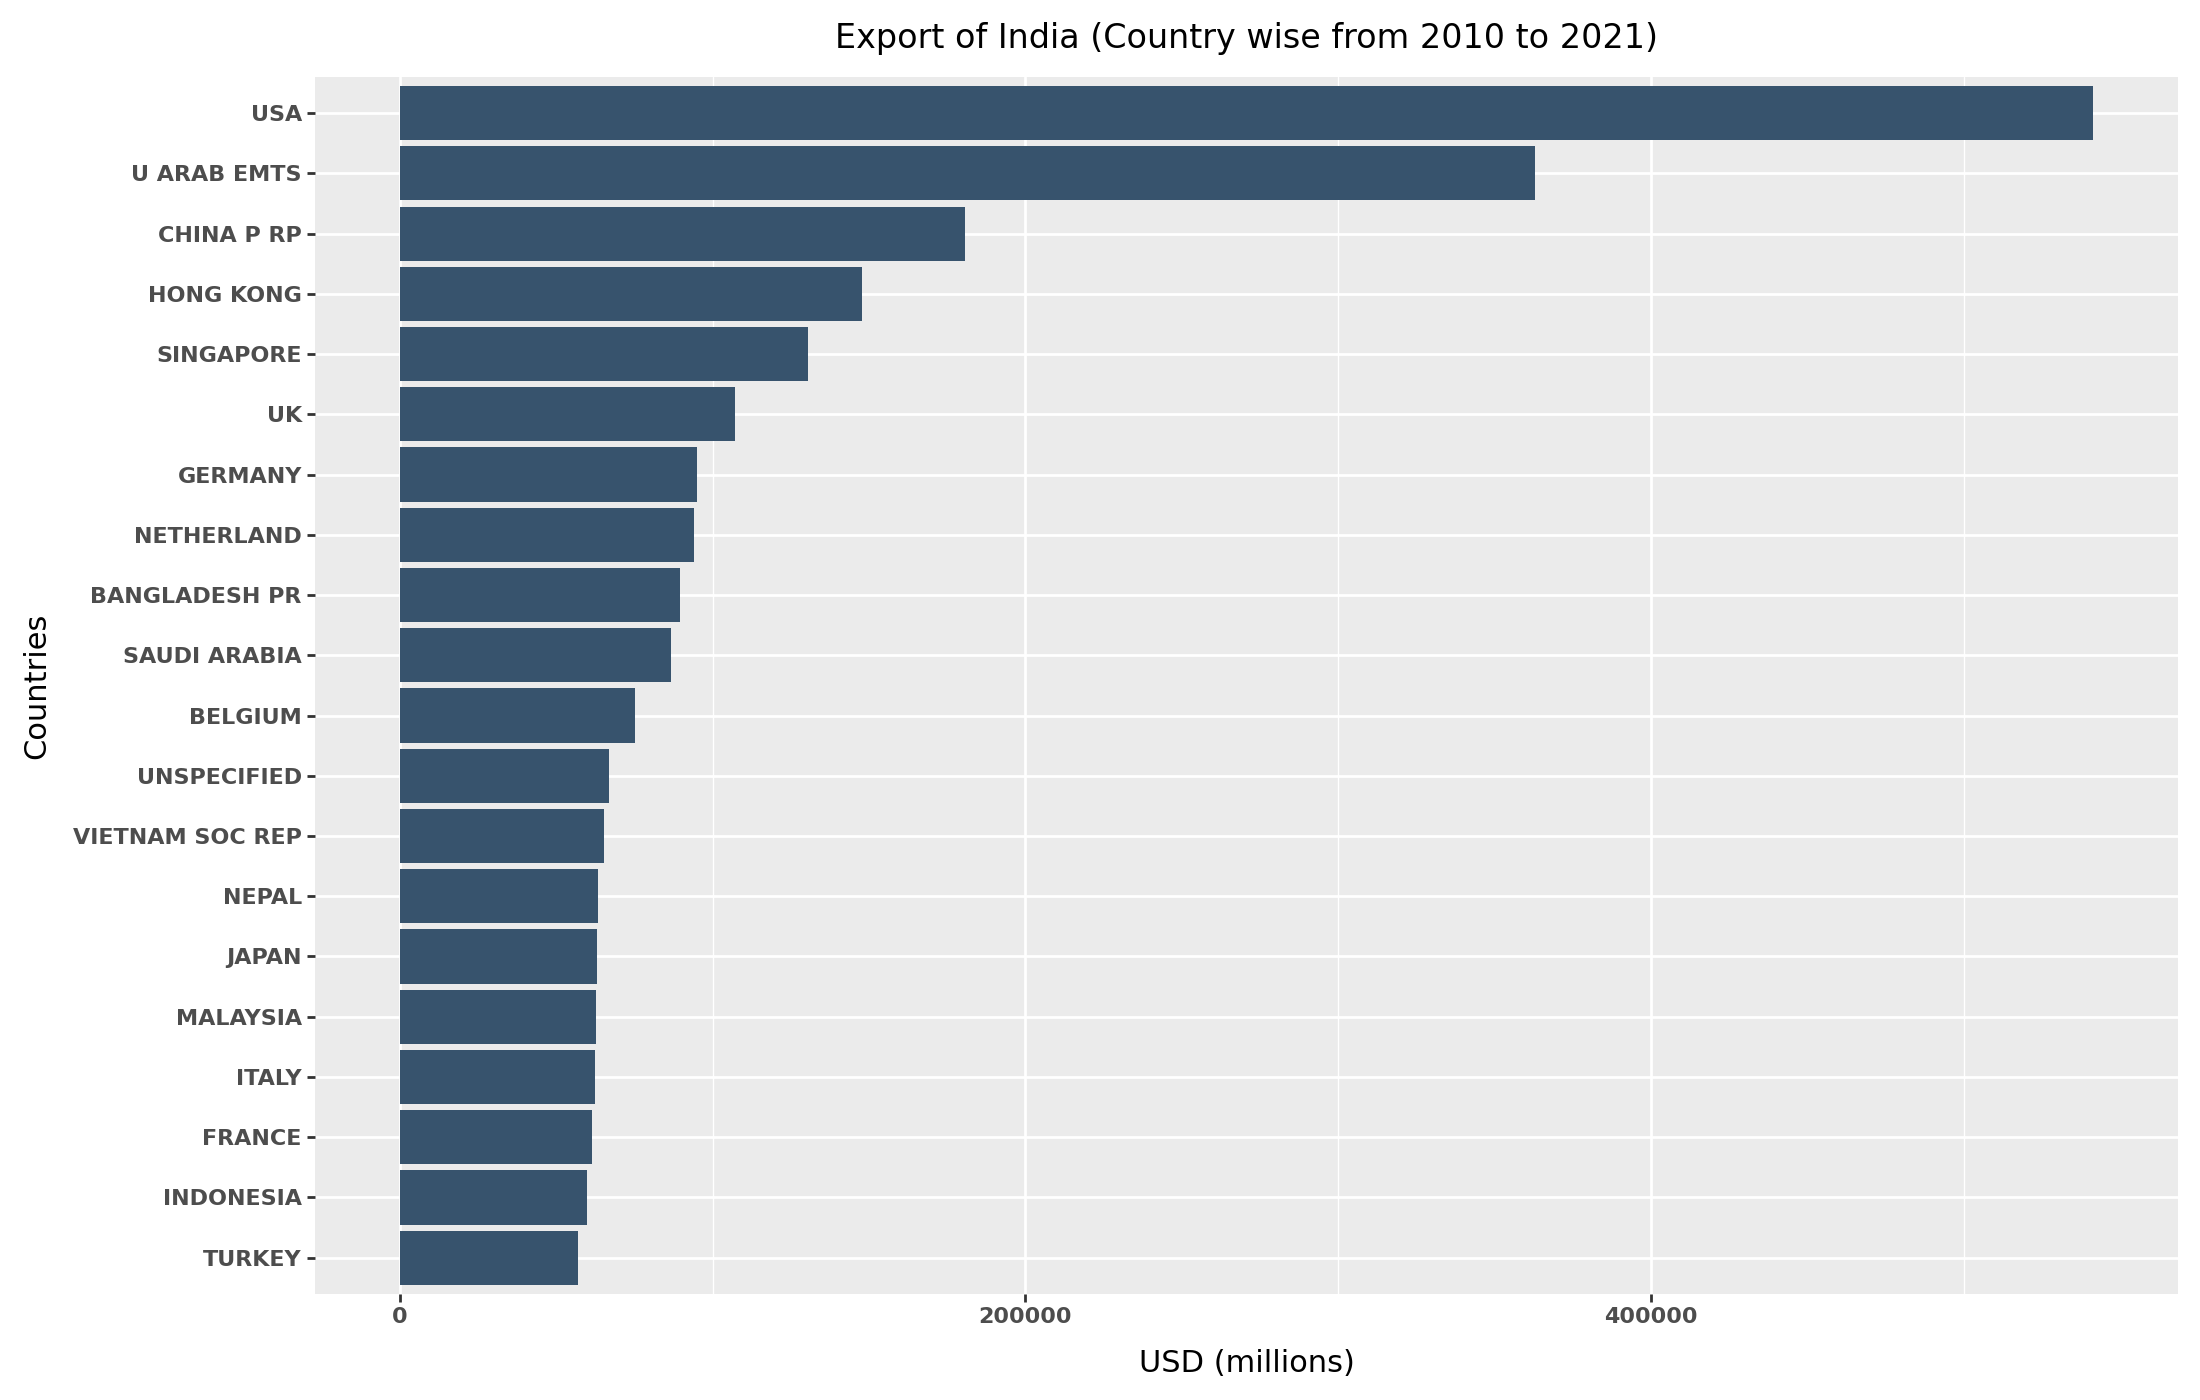

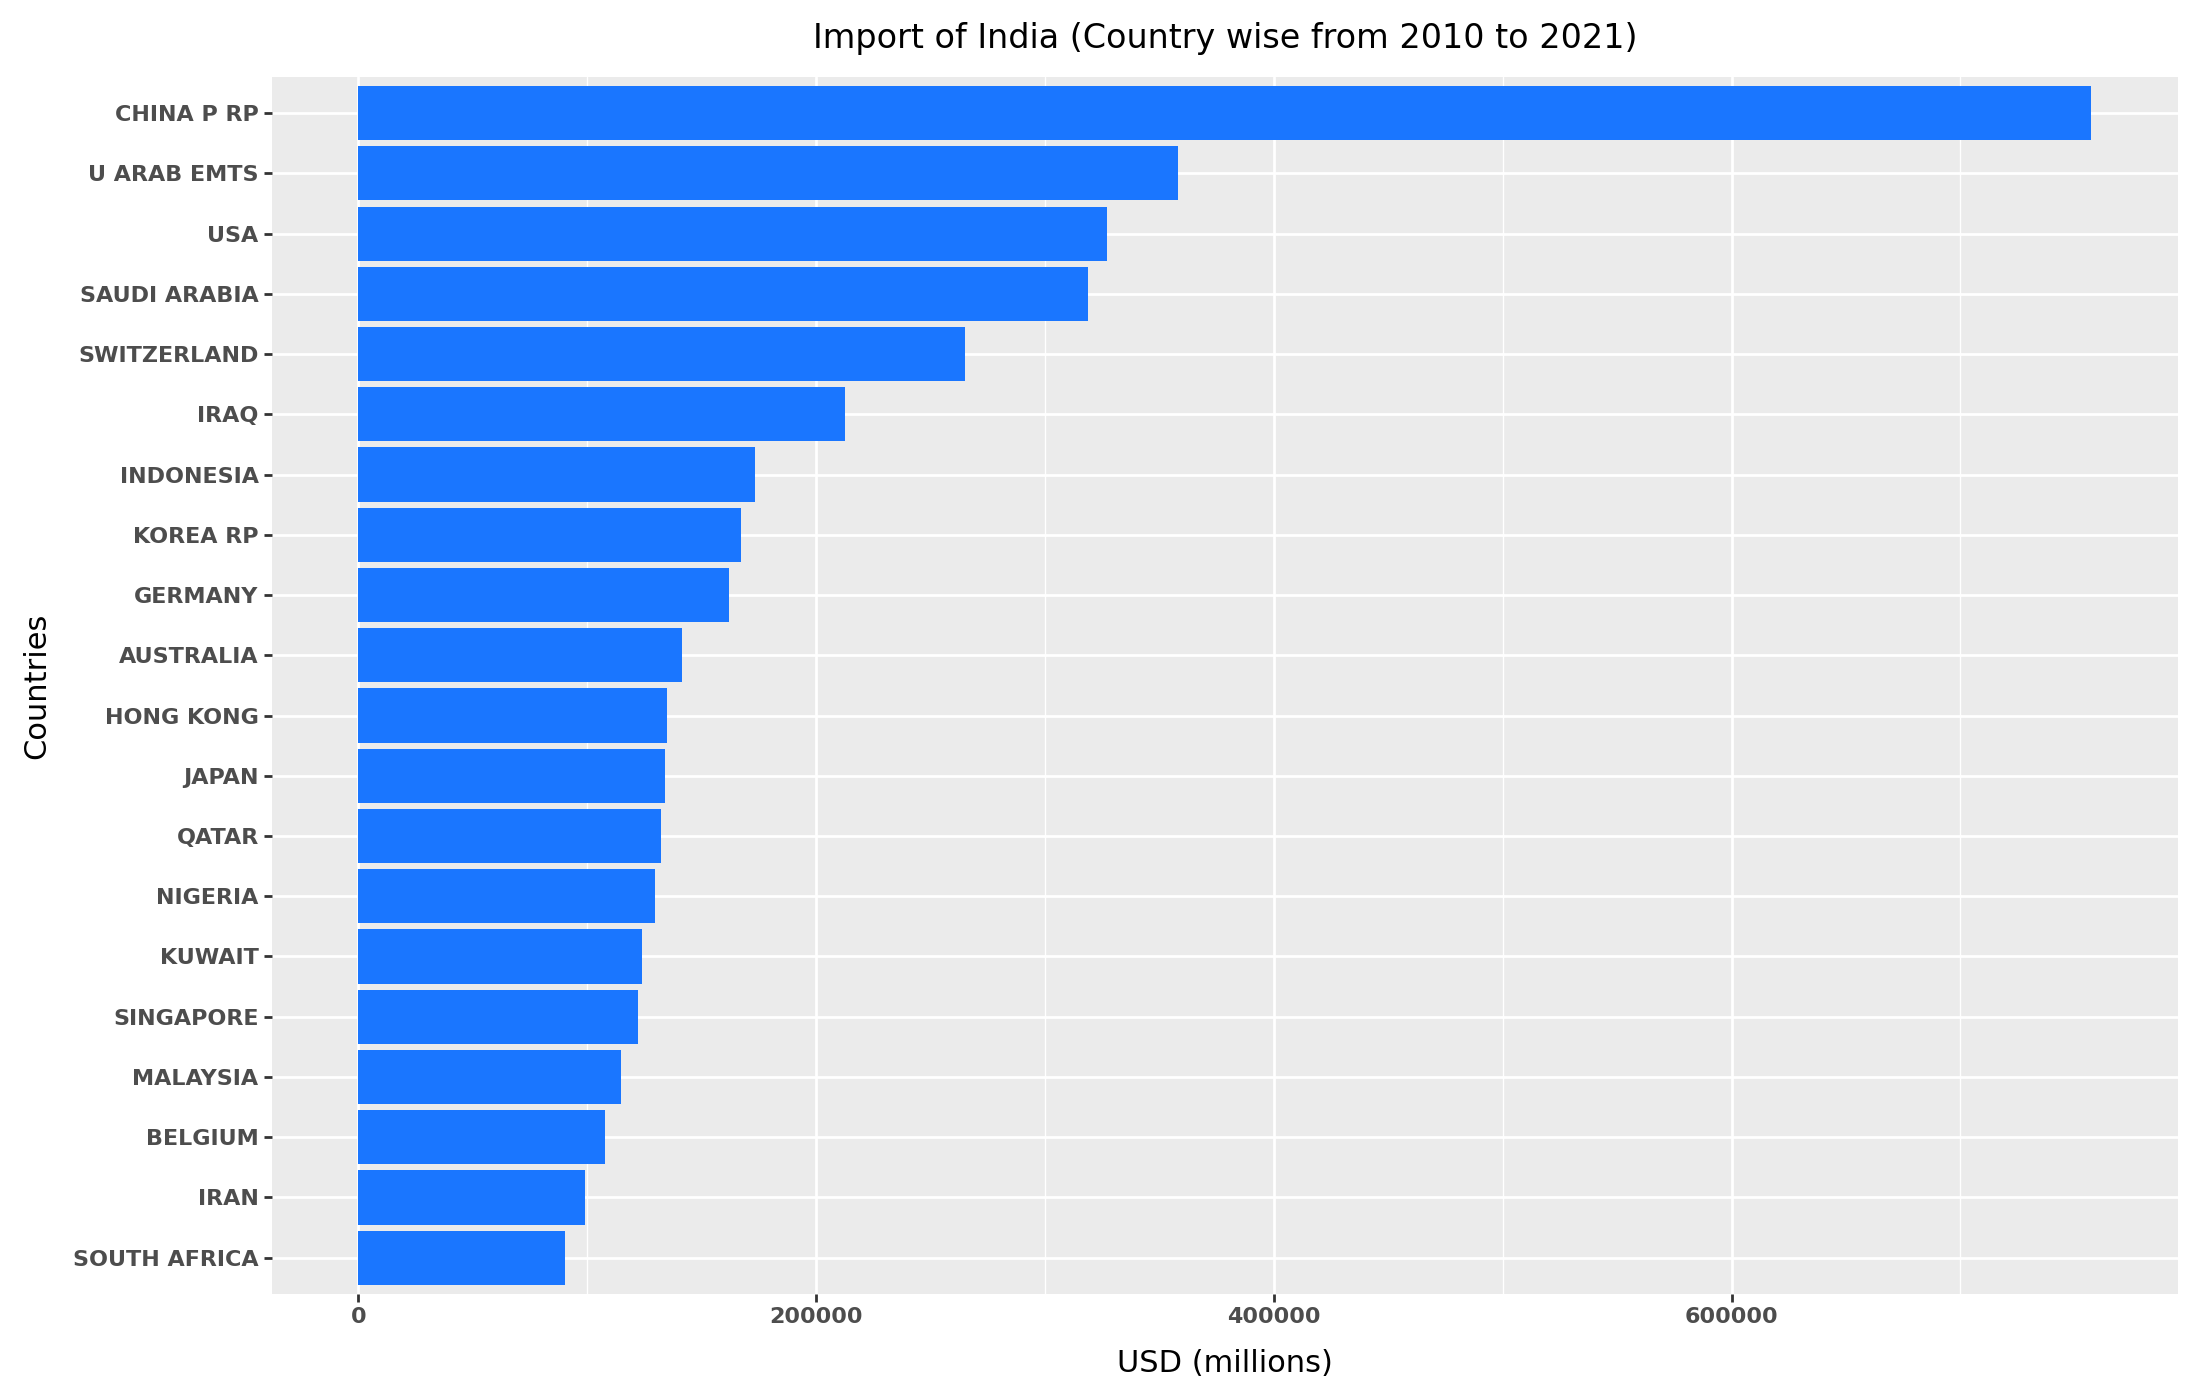

In [171]:
plot = (ggplot(exp_country, aes(x='reorder(exp_country.index, +Export)', y='Export')) +
        geom_bar(stat='identity', fill='#37536d') + 
        theme(axis_text_x=element_text(size=8, weight='bold'),  
              axis_text_y=element_text(size=8, weight='bold'),  
              plot_title=element_text(size=12),
             figure_size=(11,7)) +
        labs(x='Countries', y='USD (millions)', title='Export of India (Country wise from 2010 to 2021)') +
        coord_flip())

print(plot)
ggsave(plot,"plot7.png")
plot = (ggplot(imp_country, aes(x='reorder(imp_country.index, +Import)', y='Import')) +
        geom_bar(stat='identity', fill='#1a76ff') + 
        scale_fill_brewer(type='qual', palette='Set1') +
        theme(axis_text_x=element_text(size=8, weight='bold'),  
              axis_text_y=element_text(size=8, weight='bold'),  
              plot_title=element_text(size=12),
             figure_size=(11,7)) +
        labs(x='Countries', y='USD (millions)', title='Import of India (Country wise from 2010 to 2021)') +
        coord_flip())

print(plot)
ggsave(plot,"plot8.png")

* China has the biggest market in India followed by UAE, USA and Saudi Arabia 
* For India, USA is the biggest importer followed by UAE and China.

In [172]:
'''Create pivot table of export/import (country wise)'''
exp_country_table = pd.pivot_table(df_export, values = 'value', index = 'country', columns = 'year')
imp_country_table = pd.pivot_table(df_import, values = 'value', index = 'country', columns = 'year')
bold('**Direction of Foreign Trade Export in India**')
display(exp_country_table.sample(n=5))
bold('**Direction of Foreign Trade Import in India**')
display(imp_country_table.sample(n=5))

**Direction of Foreign Trade Export in India**

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,,,,,,
TAJIKISTAN,0.435238,0.545385,0.879250,1.356250,1.118542,0.541951,0.497561,0.498333,0.569744,0.602821,1.243023,0.820698
ERITREA,0.544222,0.750476,0.451190,0.365333,0.333571,0.207097,0.128000,0.211714,0.347308,0.245417,0.248158,0.457632
UGANDA,3.252444,5.240241,5.222921,6.027841,6.364943,6.474545,5.554157,5.847582,6.443222,7.061023,7.446111,7.751111
GUATEMALA,1.877333,2.854030,3.563651,3.216970,3.367059,3.819104,3.599552,4.229565,4.424058,3.989589,4.358553,7.774930
UK,75.099588,87.649388,87.879796,100.812165,96.077113,92.929053,87.038367,100.946042,96.968646,91.016563,84.971563,108.968438


**Direction of Foreign Trade Import in India**

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,,,,,,
BOLIVIA,0.515385,0.506250,1.058571,0.403333,0.296667,15.015625,9.132105,39.250588,50.130588,60.420000,89.163077,121.912941
LESOTHO,0.380000,0.608000,1.453333,0.833333,0.230000,1.235000,12.455000,29.856667,0.000000,0.040000,0.085000,NaN
BHUTAN,10.077500,11.252778,8.631579,8.950000,8.325556,11.249600,13.991818,14.536538,12.365333,13.524000,17.319200,18.794828
GIBRALTAR,11.570000,0.060000,0.045000,0.065000,0.000000,NaN,NaN,0.010000,0.030000,1.010000,0.153333,0.125000
COLOMBIA,20.885122,12.723409,47.055000,108.056957,50.831667,17.560870,13.198889,13.172889,22.446170,18.430227,29.863617,61.755625


**Trend of the Direction of Foreign Trade Export in India From 2010 to 2021**

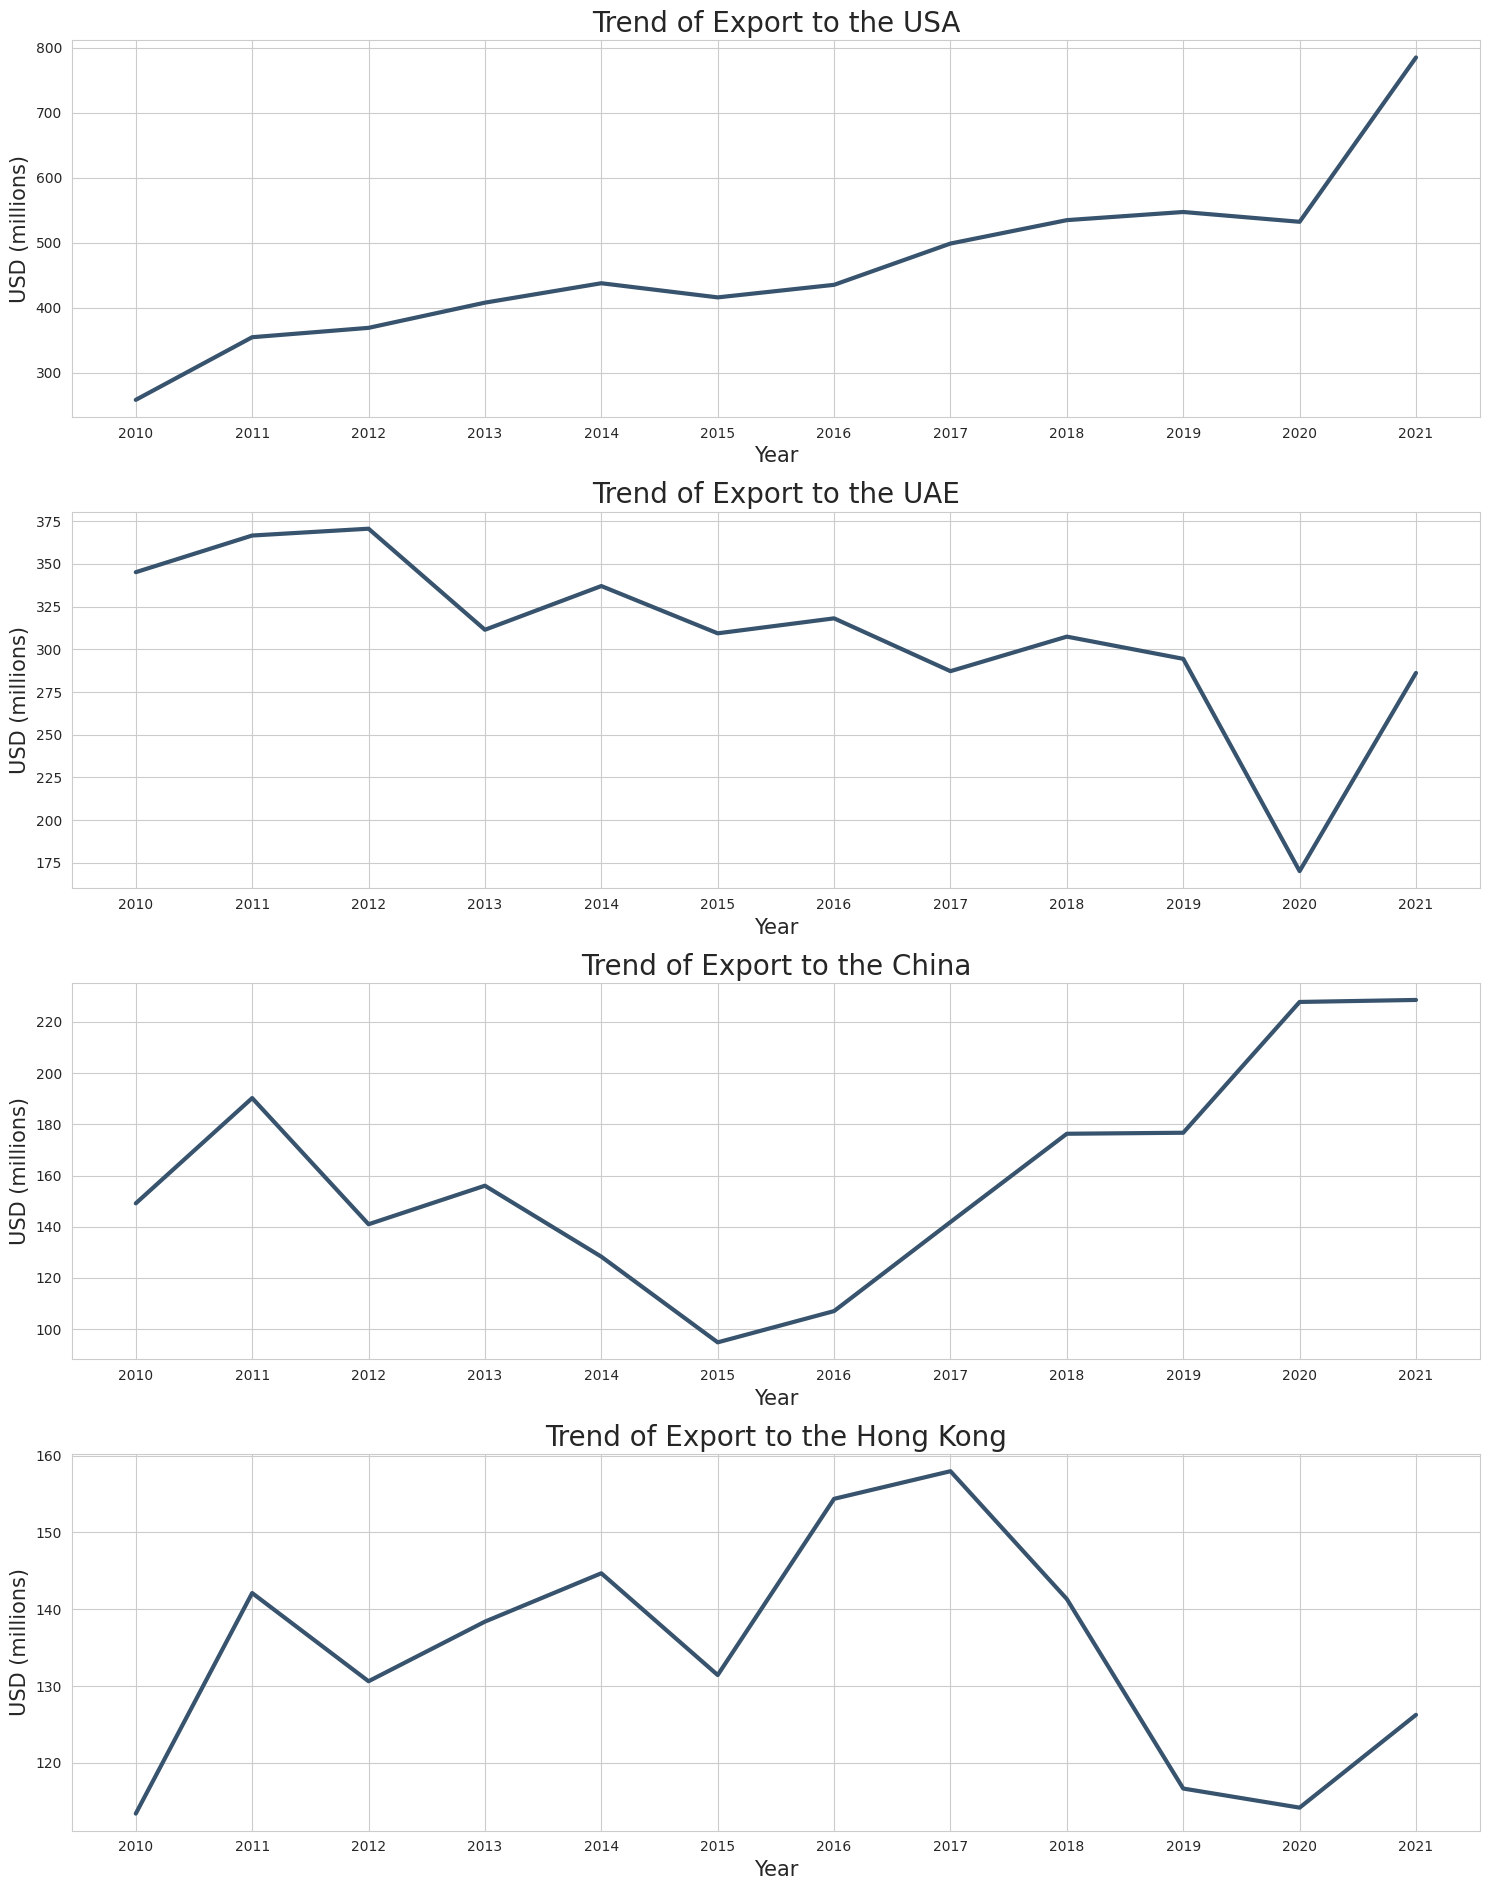

In [173]:
bold('**Trend of the Direction of Foreign Trade Export in India From 2010 to 2021**')
plt.figure(figsize=(15,19))
 
plt.subplot(411)
g = exp_country_table.loc["USA"].plot(color='#37536d', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_xticks(categorical_years)
g.set_title('Trend of Export to the USA', size = 20)

plt.subplot(412)
g1 = exp_country_table.loc["U ARAB EMTS"].plot(color='#37536d', linewidth=3)
g1.set_ylabel('USD (millions)', fontsize = 15)
g1.set_xlabel('Year', fontsize = 15)
g1.set_xticks(categorical_years)
g1.set_title('Trend of Export to the UAE', size = 20)

plt.subplot(413)
g2 = exp_country_table.loc["CHINA P RP"].plot(color='#37536d', linewidth=3)
g2.set_ylabel('USD (millions)', fontsize = 15)
g2.set_xlabel('Year', fontsize = 15)
g2.set_xticks(categorical_years)
g2.set_title('Trend of Export to the China', size = 20)


plt.subplot(414)
g3 = exp_country_table.loc["HONG KONG"].plot(color='#37536d', linewidth=3)
g3.set_ylabel('USD (millions)', fontsize = 15)
g3.set_xlabel('Year', fontsize = 15)
g3.set_xticks(categorical_years)
g3.set_title('Trend of Export to the Hong Kong', size = 20)

plt.subplots_adjust(hspace = 0.4)
plt.tight_layout()
plt.savefig('plot9.png')
plt.show()


* Every year India has increased its export to USA and therefore USA is growing as one of the major trading partners of India.
* Exports to UAE show decreasing trend from 2012 to 2020, with rise in 2021
* Exports to China have also shown a decreasing trend from 2011 to 2015, afterwards it started to increase.
* Exports to Hong Kong have shown a decrease fronm the year 2017 till 2020.

**Trend of the Direction of Foreign Trade Export in India From 2010 to 2021**

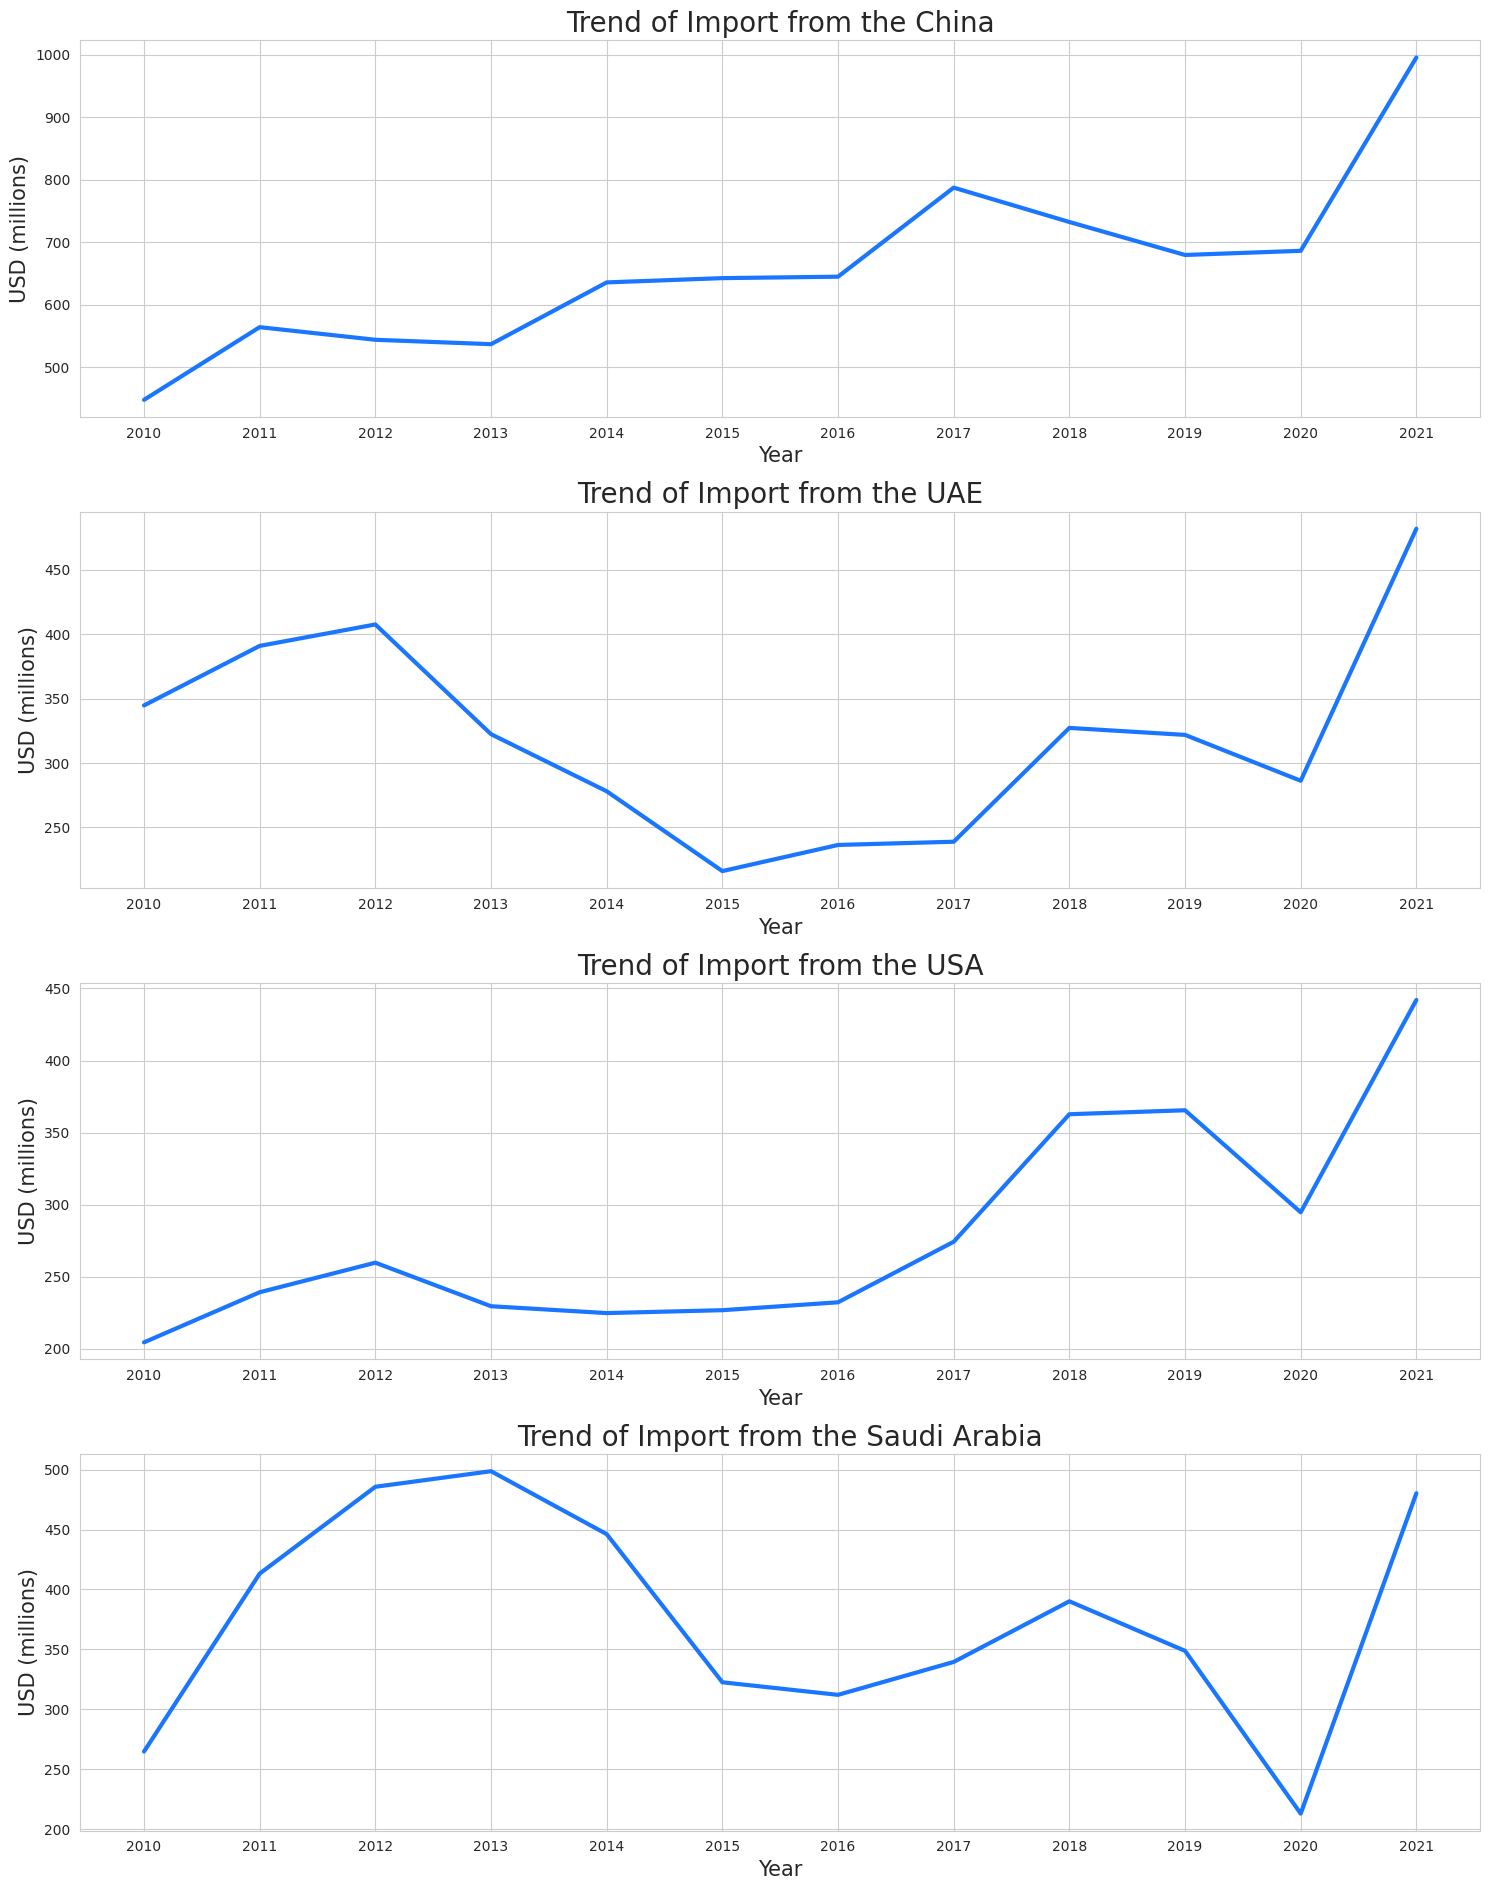

In [174]:
bold('**Trend of the Direction of Foreign Trade Export in India From 2010 to 2021**')
plt.figure(figsize=(15,19))
 
plt.subplot(411)
g = imp_country_table.loc["CHINA P RP"].plot(color='#1a76ff', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_xticks(categorical_years)
g.set_title('Trend of Import from the China', size = 20)

plt.subplot(412)
g1 = imp_country_table.loc["U ARAB EMTS"].plot(color='#1a76ff', linewidth=3)
g1.set_ylabel('USD (millions)', fontsize = 15)
g1.set_xlabel('Year', fontsize = 15)
g1.set_xticks(categorical_years)
g1.set_title('Trend of Import from the UAE', size = 20)

plt.subplot(413)
g2 = imp_country_table.loc["USA"].plot(color='#1a76ff', linewidth=3)
g2.set_ylabel('USD (millions)', fontsize = 15)
g2.set_xlabel('Year', fontsize = 15)
g2.set_xticks(categorical_years)
g2.set_title('Trend of Import from the USA', size = 20)


plt.subplot(414)
g3 = imp_country_table.loc["SAUDI ARABIA"].plot(color='#1a76ff', linewidth=3)
g3.set_ylabel('USD (millions)', fontsize = 15)
g3.set_xlabel('Year', fontsize = 15)
g3.set_xticks(categorical_years)
g3.set_title('Trend of Import from the Saudi Arabia', size = 20)

plt.subplots_adjust(hspace = 0.4)
plt.tight_layout()
plt.savefig('plot10.png')
plt.show()


* From 2010 to 2016, imports from USA were low, after 2016 it started to increase .
* Imports from UAE and Suadi Arab show a similar trend. Imports fall during 2012 to 2015, after 2015 it started to increase.
* Imports from China has been continuously rising.

In [175]:
req=['USA', 'U ARAB EMTS', 'CHINA P RP', 'HONG KONG']
df_exp_tmp=df_export.loc[df_export['country'].isin(req) , ['value', 'year', 'country'] ]
req=['CHINA P RP', 'U ARAB EMTS', 'USA', 'SAUDI ARABIA']
df_imp_tmp=df_import.loc[df_import['country'].isin(req) , ['value', 'year', 'country'] ]

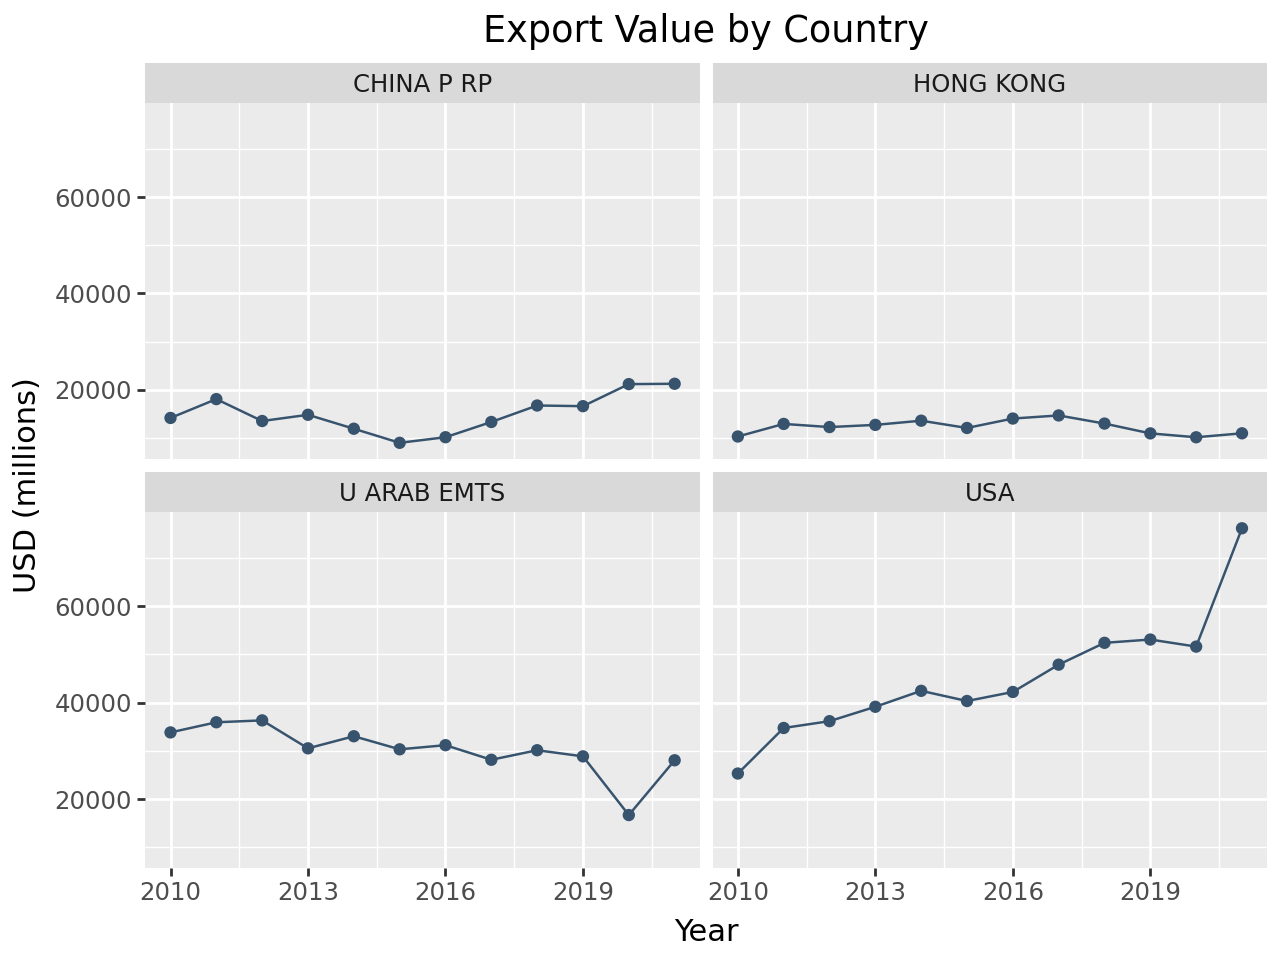

In [176]:
export_agg = df_exp_tmp.groupby(['year', 'country'])['value'].sum().reset_index()
plot = (ggplot(export_agg, aes(x='year', y='value')) + 
    geom_line(color='#37536d') + 
    geom_point(color='#37536d') +
    facet_wrap('~country', nrow=2) + 
    xlab("Year") + 
    ylab("USD (millions)") + 
    ggtitle("Export Value by Country"))

print(plot)
ggsave(plot,"plot13.png")

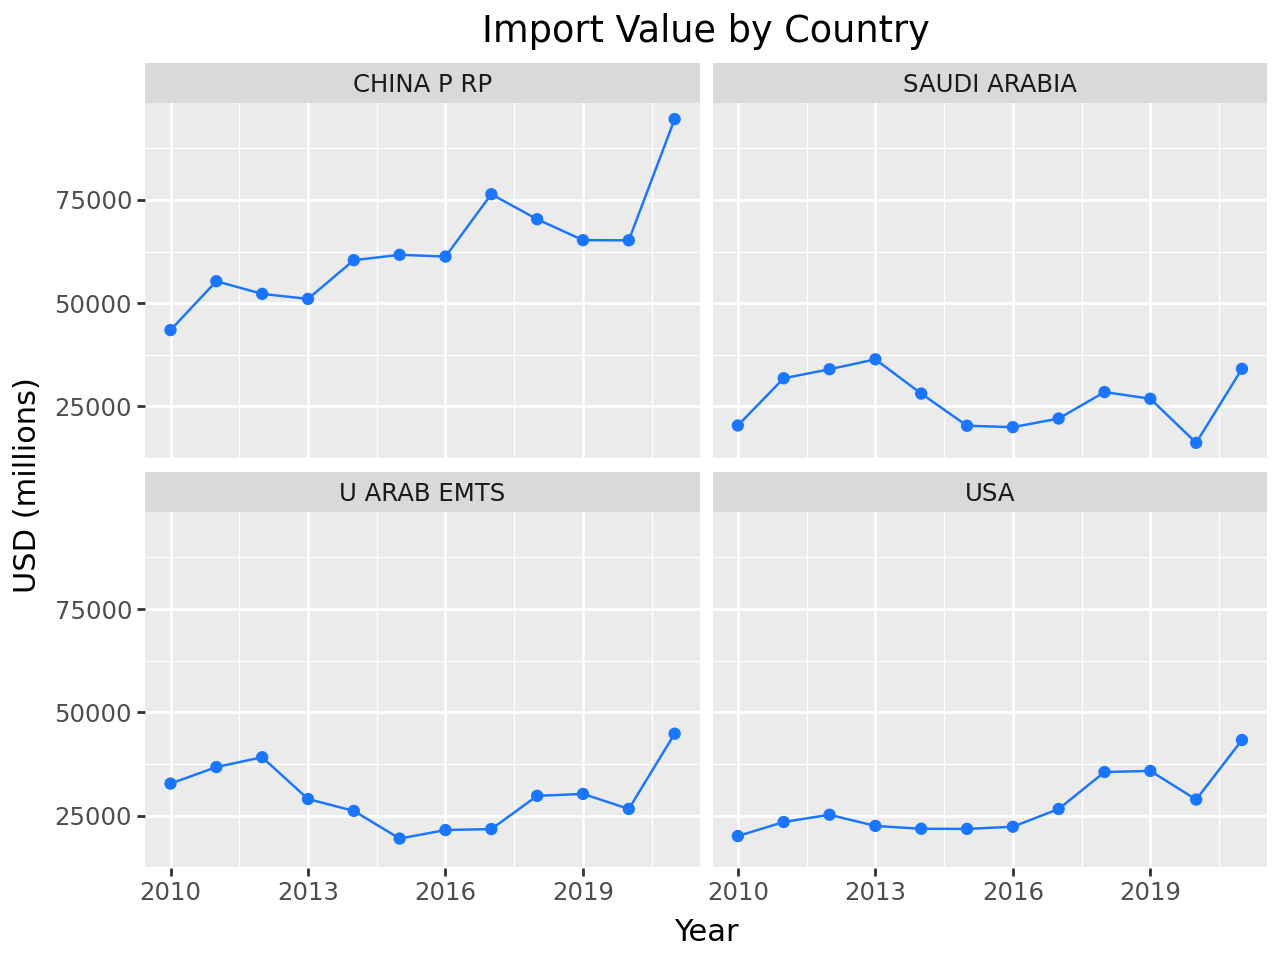

In [177]:
import_agg = df_imp_tmp.groupby(['year', 'country'])['value'].sum().reset_index()
plot = (ggplot(import_agg, aes(x='year', y='value')) + 
    geom_line(color='#1a76ff') + 
    geom_point(color='#1a76ff') +
    facet_wrap('~country', nrow=2) + 
    xlab("Year") + 
    ylab("USD (millions)") + 
    ggtitle("Import Value by Country"))

print(plot)
ggsave(plot,"plot14.png")

## HS Code Wise Analysis

For HScode Wise Analysis, we are creating dataframe according to Hs Codes list and Section

**List Of Indian HS Classification is based on HS Code used in actual Shipment Data:**  http://www.cybex.in/HS-Codes/Default.aspx

In [178]:
''' creating a new dataframe on Sections of HSCode'''
HSCode = pd.DataFrame() 
HSCode['Start']=[1,6,15,16,25,28,39,41,44,47,50,64,68,71,72,84,86,90,93,94,97]
HSCode['End']=[5,14,15,24,27,38,40,43,46,49,63,67,70,71,83,85,89,92,93,96,99]
HSCode['Sections Name']=['Animals & Animal Products',
'Vegetable Products',
'Animal Or Vegetable Fats',
'Prepared Foodstuffs',
'Mineral Products',
'Chemical Products',
'Plastics & Rubber',
'Hides & Skins',
'Wood & Wood Products',
'Wood Pulp Products',
'Textiles & Textile Articles',
'Footwear, Headgear',
'Articles Of Stone, Plaster, Cement, Asbestos',
'Pearls, Precious Or Semi-Precious Stones, Metals',
'Base Metals & Articles Thereof',
'Machinery & Mechanical Appliances',
'Transportation Equipment',
'Instruments - Measuring, Musical',
'Arms & Ammunition',
'Miscellaneous',
'Works Of Art',]
HSCode.index += 1
HSCode.index.name = 'Section'

In [179]:
bold('**List Of indian HS Classification is based on the HS Code:**')
display(HSCode)

**List Of indian HS Classification is based on the HS Code:**

,Start,End,Sections Name
Section,,,
1,1,5,Animals & Animal Products
2,6,14,Vegetable Products
3,15,15,Animal Or Vegetable Fats
4,16,24,Prepared Foodstuffs
5,25,27,Mineral Products
6,28,38,Chemical Products
7,39,40,Plastics & Rubber
8,41,43,Hides & Skins
9,44,46,Wood & Wood Products


In [180]:
df_export['Sections Name'] = df_export['HSCode']
df_import['Sections Name'] = df_import['HSCode']
for i in range(1,22):
    df_export.loc[(df_export['Sections Name'] >= HSCode['Start'][i]) & (df_export['Sections Name'] <= HSCode['End'][i]),'Sections Name']=i
    df_import.loc[(df_import['Sections Name'] >= HSCode['Start'][i]) & (df_import['Sections Name'] <= HSCode['End'][i]),'Sections Name']=i

In [181]:
print(df_export)

        HSCode                                          Commodity  value  \
0            2                        MEAT AND EDIBLE MEAT OFFAL.   1.40   
1            3  FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...   0.08   
2            4  DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...   3.89   
3            7    EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.   0.17   
4            8  EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...   0.12   
...        ...                                                ...    ...   
165492      94  FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPO...   0.19   
165493      95  TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...   0.03   
165494      96               MISCELLANEOUS MANUFACTURED ARTICLES.   0.31   
165495      98                  PROJECT GOODS; SOME SPECIAL USES.   0.01   
165496      99                               MISCELLANEOUS GOODS.   0.00   

            country  year  Sections Name  
0       AFGHANISTAN  2010              1  
1

In [182]:
exp_hscode = df_export.groupby(['Sections Name']).agg({'value':'sum'})
exp_hscode['Sections_Name'] = HSCode['Sections Name']
imp_hscode = df_import.groupby(['Sections Name']).agg({'value':'sum'})
imp_hscode['Sections_Name'] = HSCode['Sections Name']

In [183]:
print(exp_hscode)
print(imp_hscode)

                   value                                     Sections_Name
Sections Name                                                             
1              110692.18                         Animals & Animal Products
2              213836.65                                Vegetable Products
3               13119.69                          Animal Or Vegetable Fats
4               87690.55                               Prepared Foodstuffs
5              631776.46                                  Mineral Products
6              458731.77                                 Chemical Products
7              107686.51                                 Plastics & Rubber
8               37685.75                                     Hides & Skins
9                5054.63                              Wood & Wood Products
10              21476.48                                Wood Pulp Products
11             427602.33                       Textiles & Textile Articles
12              33843.44 

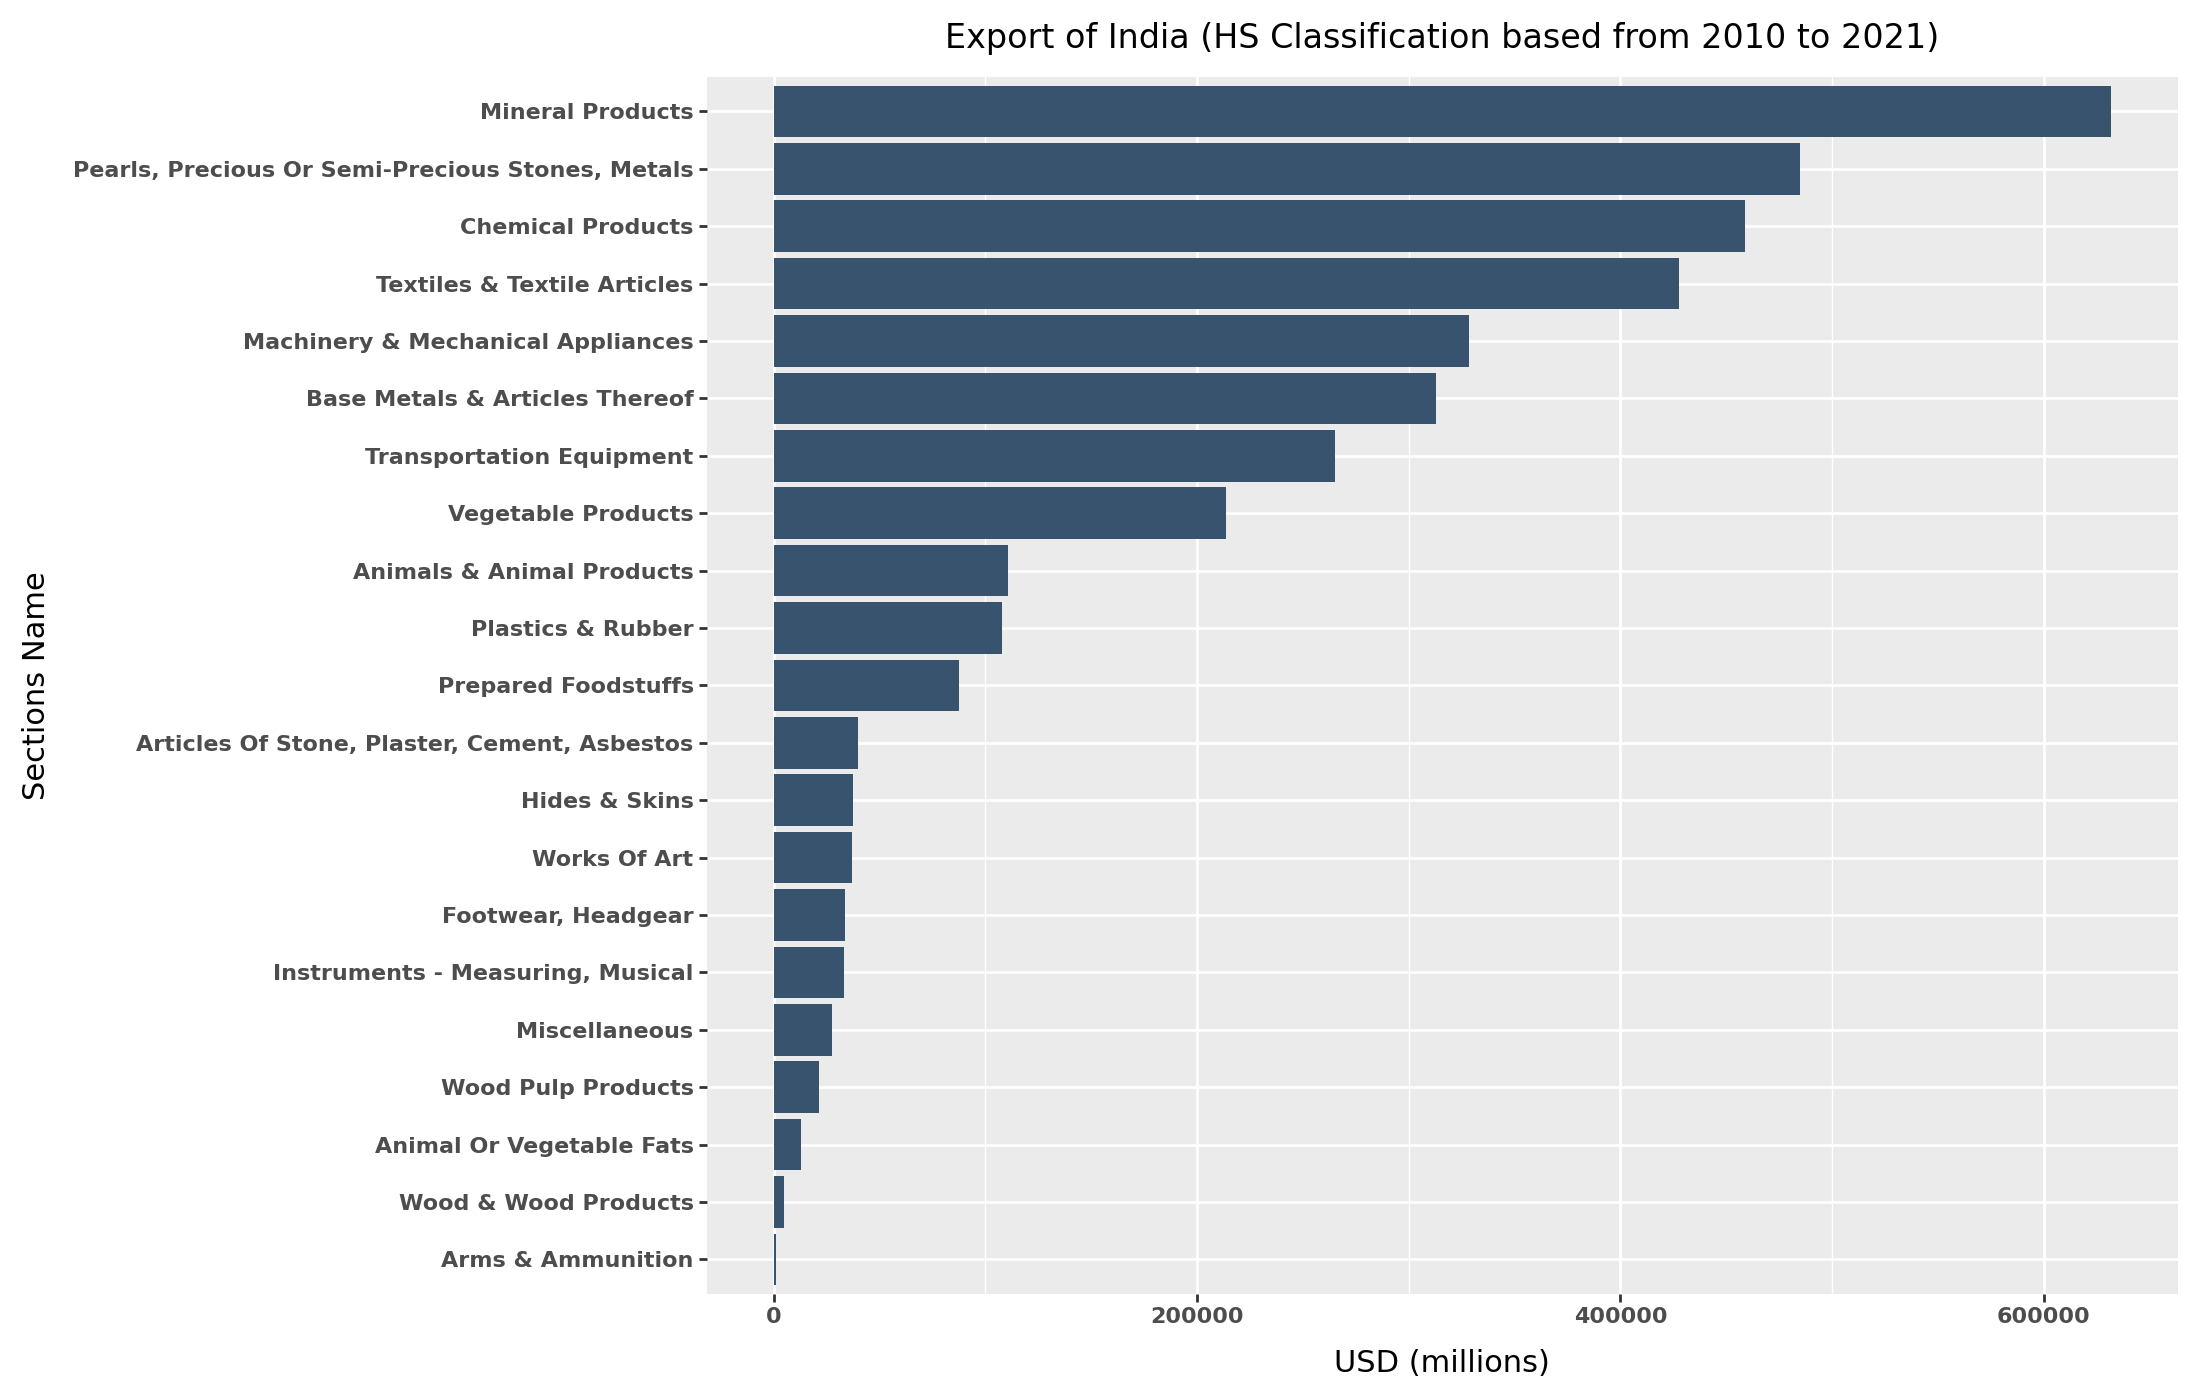

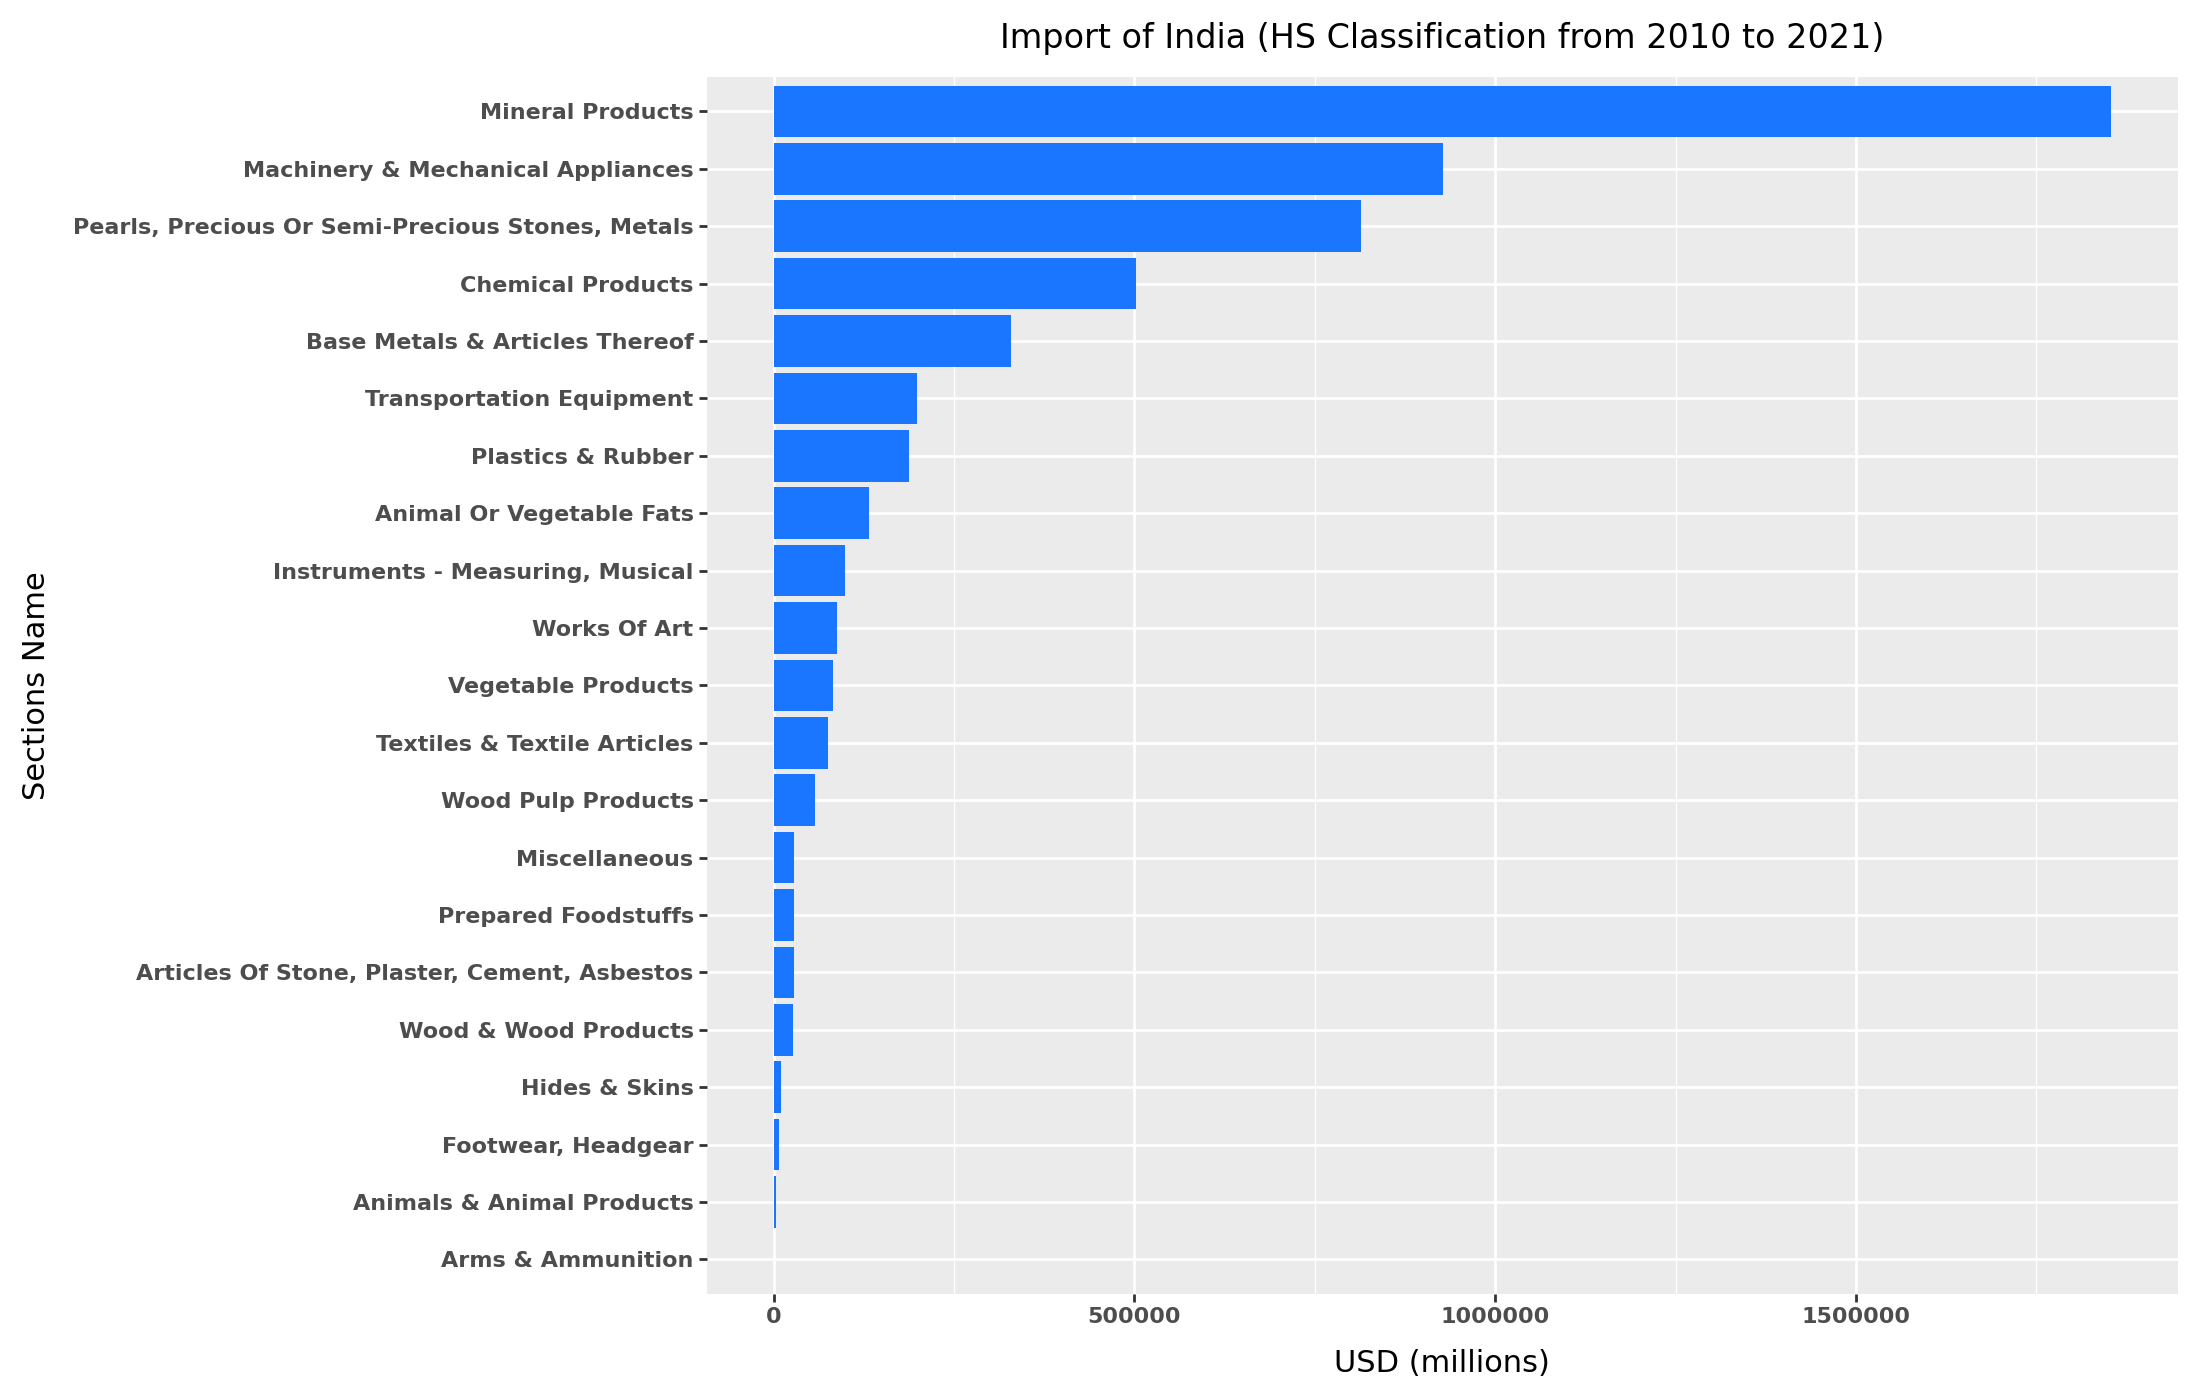

In [184]:
plot = (ggplot(exp_hscode, aes(x='reorder(Sections_Name, +value)', y='value')) +
        geom_bar(stat='identity', fill='#37536d') + 
        theme(axis_text_x=element_text(size=8, weight='bold'),  
              axis_text_y=element_text(size=8, weight='bold'),  
              plot_title=element_text(size=12),
             figure_size=(11,7)) +
        labs(x='Sections Name', y='USD (millions)', title='Export of India (HS Classification based from 2010 to 2021)') +
        coord_flip())

print(plot)
ggsave(plot,"plot11.png")
plot = (ggplot(imp_hscode, aes(x='reorder(Sections_Name, +value)', y='value')) +
        geom_bar(stat='identity', fill='#1a76ff') + 
        scale_fill_brewer(type='qual', palette='Set1') +
        theme(axis_text_x=element_text(size=8, weight='bold'),  
              axis_text_y=element_text(size=8, weight='bold'),  
              plot_title=element_text(size=12),
             figure_size=(11,7)) +
        labs(x='Sections Name', y='USD (millions)', title='Import of India (HS Classification from 2010 to 2021)') +
        coord_flip())

print(plot)
ggsave(plot,"plot12.png")

* Above two plots give more clear picture about the export/import of goods.
* Its seems that most exporting goods are Mineral Products followed by Pearls, Precious Or Semi-Precious Stones, Metals and Chemical products etc.
* The most importing goods are Mineral Products followed by Machinery & Mechanical Appliances and Pearls, Precious Or Semi-Precious Stones, Metals, etc.

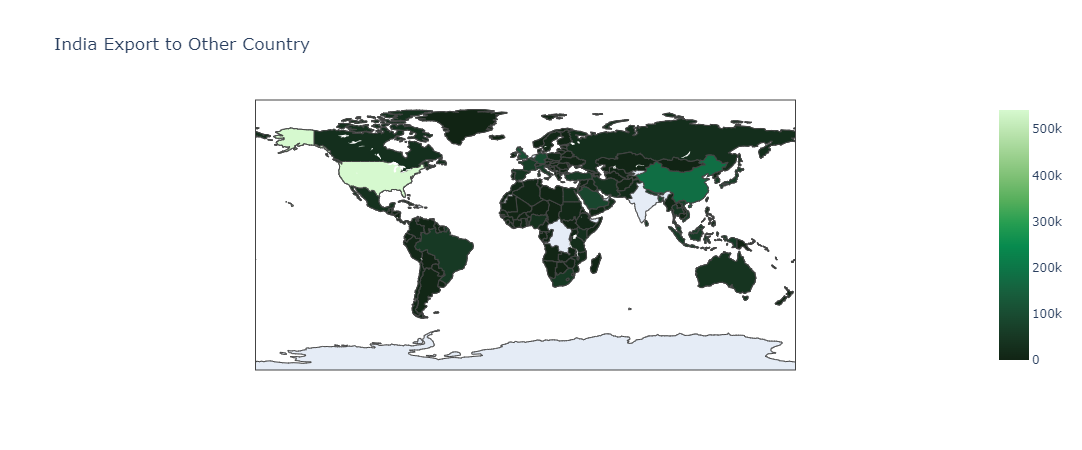

In [185]:
export_map = pd.DataFrame(df_export.groupby(['country'])['value'].sum().reset_index())
count = pd.DataFrame(export_map.groupby('country')['value'].sum().reset_index())

trace = [go.Choropleth(
            colorscale = 'algae',
            locationmode = 'country names',
            locations = count['country'],
            text = count['country'],
            z = count['value'],
            reversescale=True)]

layout = go.Layout(title = 'India Export to Other Country')

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)

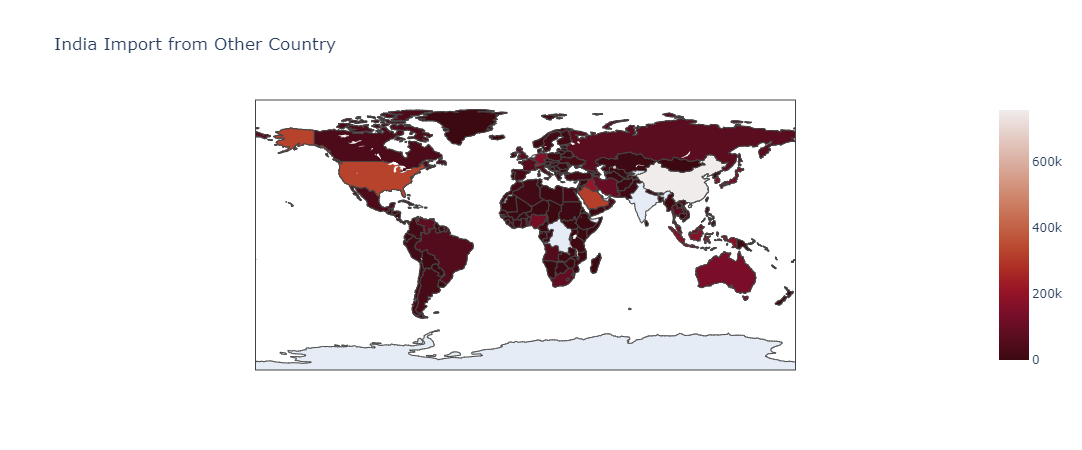

In [186]:
import_map = pd.DataFrame(df_import.groupby(['country'])['value'].sum().reset_index())
count = pd.DataFrame(import_map.groupby('country')['value'].sum().reset_index())

trace = [go.Choropleth(
            colorscale = 'amp',
            locationmode = 'country names',
            locations = count['country'],
            text = count['country'],
            z = count['value'],
            reversescale=True)]

layout = go.Layout(title = 'India Import from Other Country')

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)